<a href="https://colab.research.google.com/github/footman2017/air_quality_classification_model/blob/main/Final_Tabnet%2C_LSTM%2C_CNN_tanpa_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch_tabnet

In [ ]:
from keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, MaxPooling1D
from keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from pytorch_tabnet.augmentations import ClassificationSMOTE
from pytorch_tabnet.callbacks import History
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam

In [ ]:
df = pd.read_csv('combined_data ver 1.1.csv')
df = df.replace('---', pd.NA)
df = df.dropna()
df.reset_index(drop=True, inplace=True)

df['pm10'] = df['pm10'].astype(int)
df['pm25'] = df['pm25'].astype(int)
df['so2'] = df['so2'].astype(int)
df['co'] = df['co'].astype(int)
df['o3'] = df['o3'].astype(int)
df['no2'] = df['no2'].astype(int)

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('categori', axis=1).values)

# Save the scaler for future use
# joblib.dump(scaler, 'scaler.pkl')

# Reshape data for CNN
# X_cnn = X.reshape(-1, 6, 1)

# Convert categories to integers
encoder = LabelEncoder()
y = encoder.fit_transform(df['categori'].values)

# Get the original class labels and their integer encodings
original_classes = encoder.classes_
class_encodings = encoder.transform(original_classes)

# Print the original class labels and their corresponding integer encodings
for label, encoding in zip(original_classes, class_encodings):
    print(f"Original Class: {label}, Encoded Label: {encoding}")

y = to_categorical(y)

# Split the data into 90% training and 10% testing
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.10, stratify=df['categori'])

Original Class: BAIK, Encoded Label: 0
Original Class: SEDANG, Encoded Label: 1
Original Class: TIDAK SEHAT, Encoded Label: 2


In [ ]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=3, input_shape=(X_train_90.shape[1], 1), return_sequences=True))
    model.add(LSTM(3))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(learning_rate=0.0299223202049866)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the CNN model
def create_cnn_model(filters=32, kernel_size=2, dense_units=50, optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(
        filters=8,
        kernel_size=4,
        activation='relu',
        input_shape=(X.shape[1], 1)
        # input_shape=(6, 1)
    ))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


clf = TabNetClassifier(
    verbose=0
)

In [ ]:
def create_grafik (valid_loss, train_loss, train_accuracy, valid_accuracy):
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(train_loss, label='Train Loss')
  plt.plot(valid_loss, label='Validation Loss')
  plt.legend()
  plt.show()

  # plot accuracy
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(train_accuracy, label='Train Acc')
  plt.plot(valid_accuracy, label='Validation Acc')
  plt.legend()
  plt.show()

In [ ]:
def createConfusionMatrix(cm):
  # Plot the confusion matrix
  # plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Moderate", "Unhealthy"], yticklabels=["Good", "Moderate", "Unhealthy"])
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title("Confusion Matrix")
  plt.show()

# k-cross valdiation


---- Training on Fold 1 ----

Early stopping occurred at epoch 13 with best_epoch = 3 and best_valid_accuracy = 0.94505
TabNet train and validation
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.9383    0.9953    0.9660       214
           2     0.9783    0.9574    0.9677        47

    accuracy                         0.9451       273
   macro avg     0.6389    0.6509    0.6446       273
weighted avg     0.9040    0.9451    0.9238       273



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

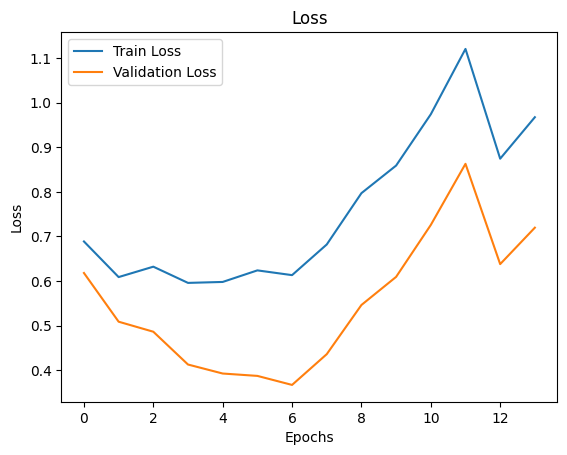

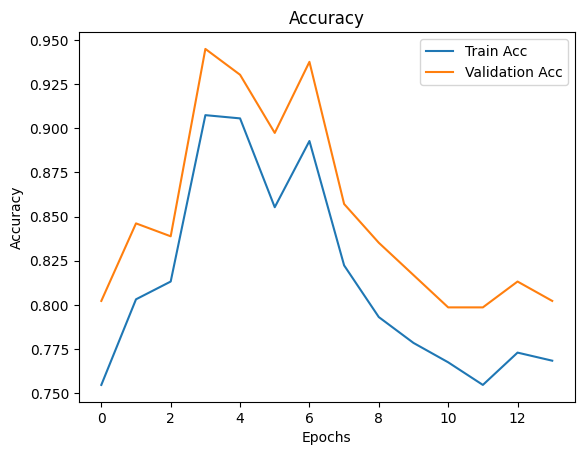

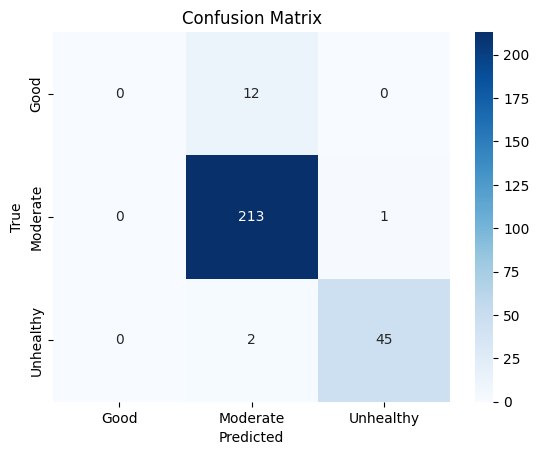

TabNet Test
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.8984    1.0000    0.9465       115
           2     1.0000    0.9600    0.9796        25

    accuracy                         0.9145       152
   macro avg     0.6328    0.6533    0.6420       152
weighted avg     0.8442    0.9145    0.8772       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


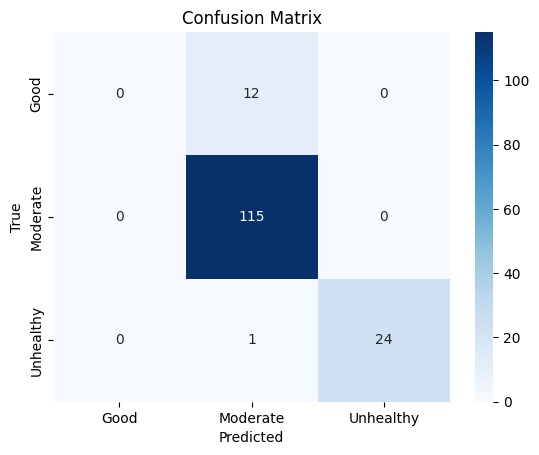

LSTM train and validation
9/9 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7839    1.0000    0.8789       214
           2     0.0000    0.0000    0.0000        47

    accuracy                         0.7839       273
   macro avg     0.2613    0.3333    0.2930       273
weighted avg     0.6145    0.7839    0.6889       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


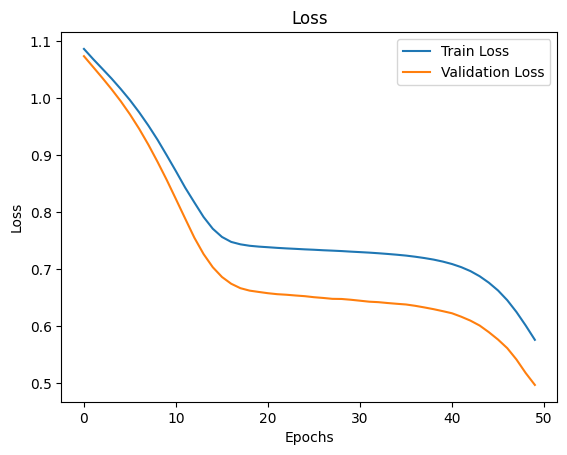

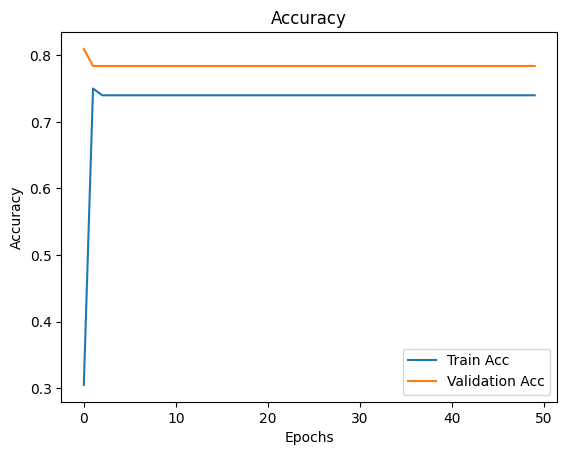

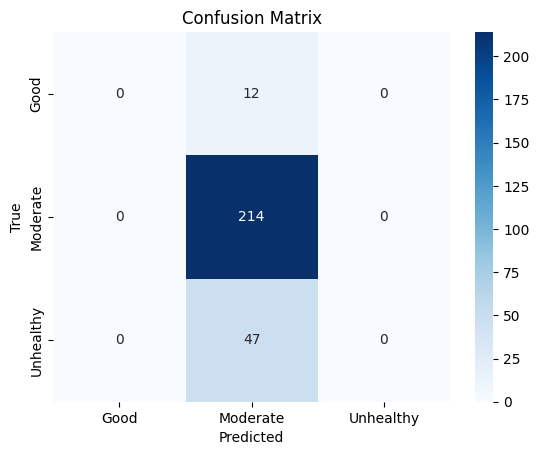

LSTM Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


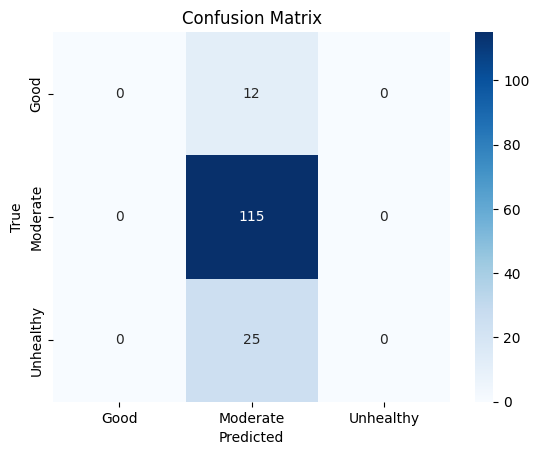

CNN train and validation
9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7839    1.0000    0.8789       214
           2     0.0000    0.0000    0.0000        47

    accuracy                         0.7839       273
   macro avg     0.2613    0.3333    0.2930       273
weighted avg     0.6145    0.7839    0.6889       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


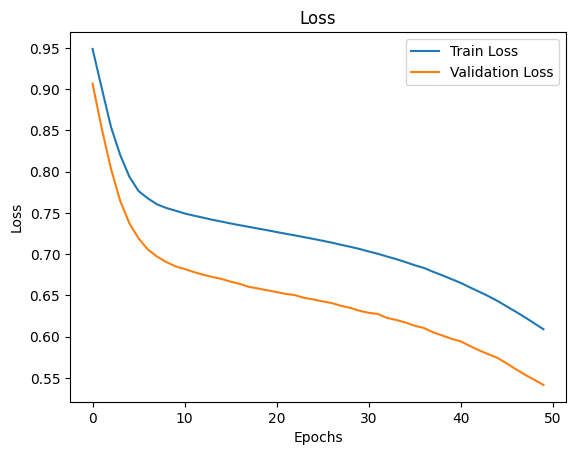

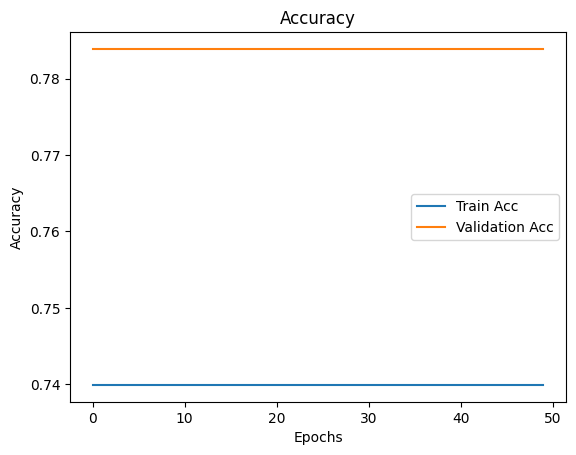

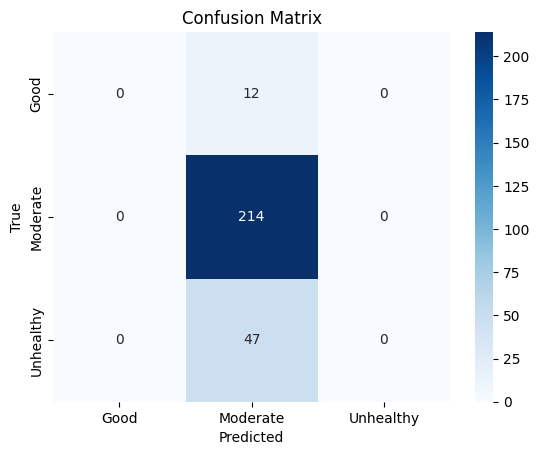

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


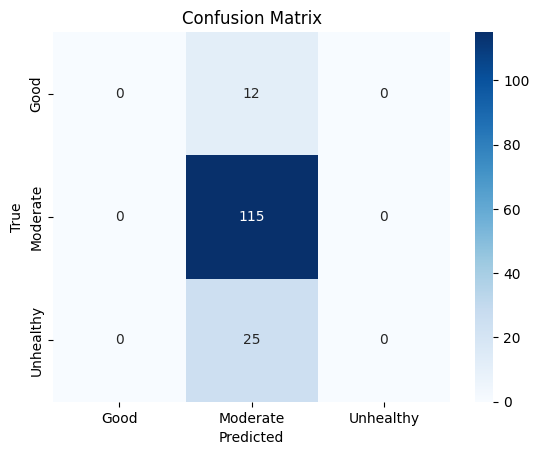


---- Training on Fold 2 ----

Early stopping occurred at epoch 19 with best_epoch = 9 and best_valid_accuracy = 0.79121
TabNet train and validation
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.7738    1.0000    0.8725       195
           2     1.0000    0.3750    0.5455        56

    accuracy                         0.7912       273
   macro avg     0.5913    0.4583    0.4726       273
weighted avg     0.7578    0.7912    0.7351       273



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

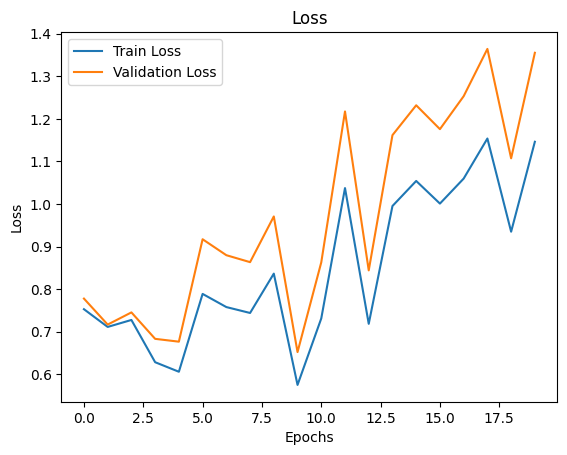

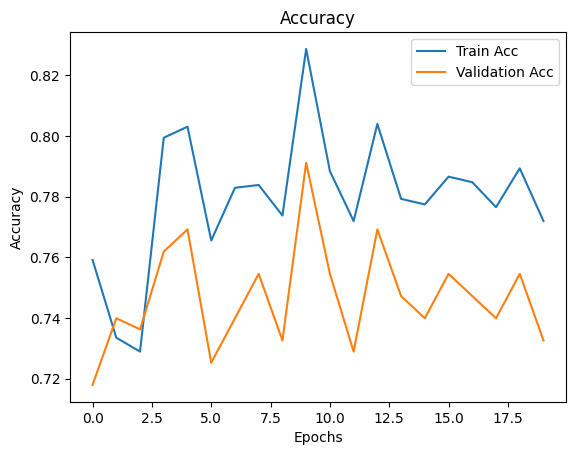

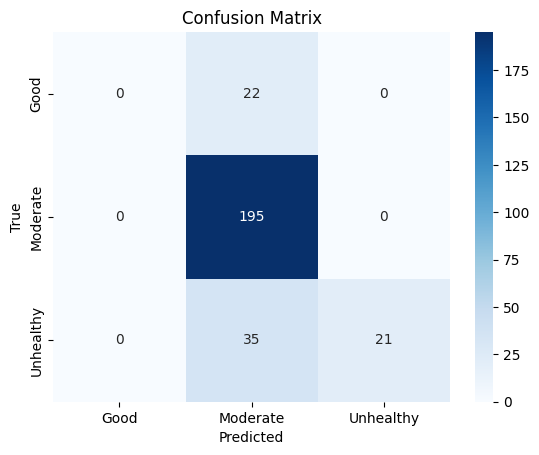

TabNet Test
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.8099    1.0000    0.8949       115
           2     1.0000    0.4000    0.5714        25

    accuracy                         0.8224       152
   macro avg     0.6033    0.4667    0.4888       152
weighted avg     0.7772    0.8224    0.7711       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


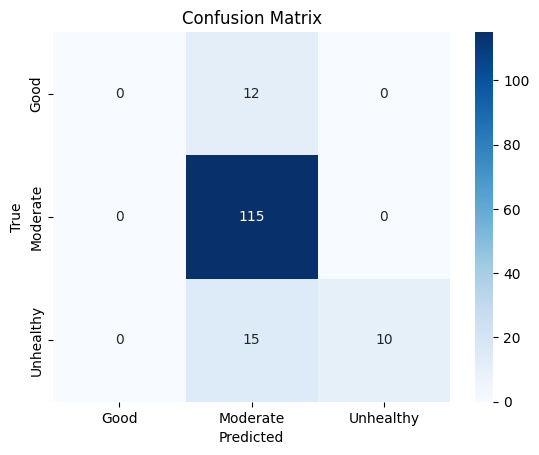

LSTM train and validation
9/9 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.7143    1.0000    0.8333       195
           2     0.0000    0.0000    0.0000        56

    accuracy                         0.7143       273
   macro avg     0.2381    0.3333    0.2778       273
weighted avg     0.5102    0.7143    0.5952       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


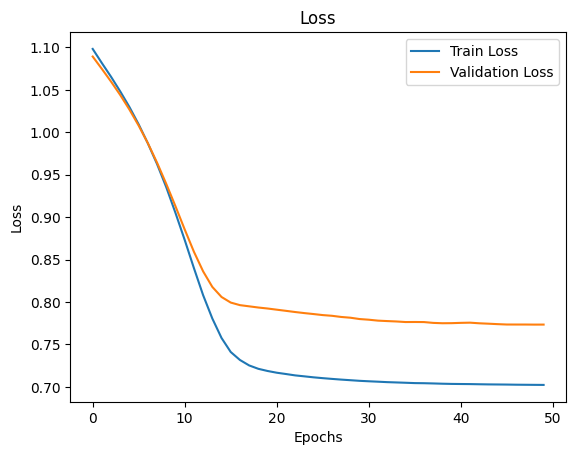

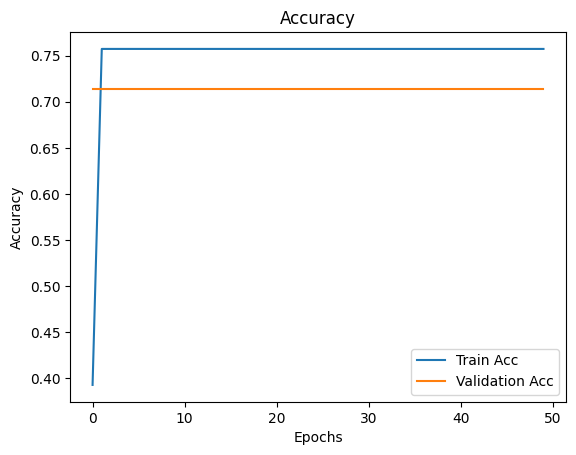

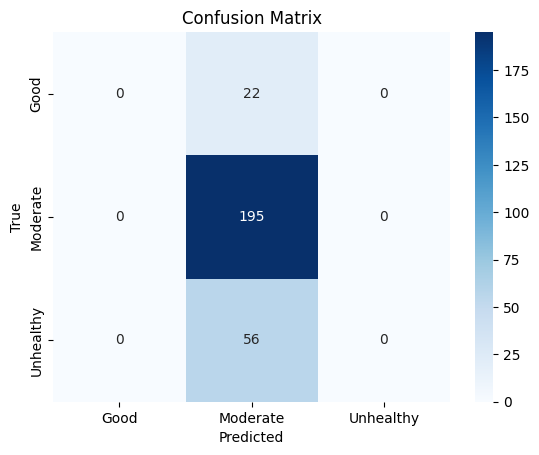

LSTM Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


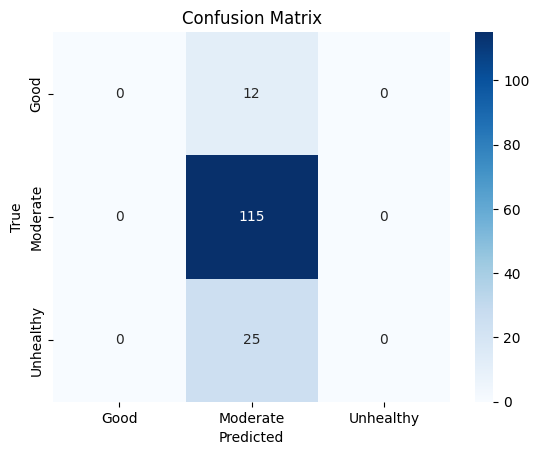

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.7143    1.0000    0.8333       195
           2     0.0000    0.0000    0.0000        56

    accuracy                         0.7143       273
   macro avg     0.2381    0.3333    0.2778       273
weighted avg     0.5102    0.7143    0.5952       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


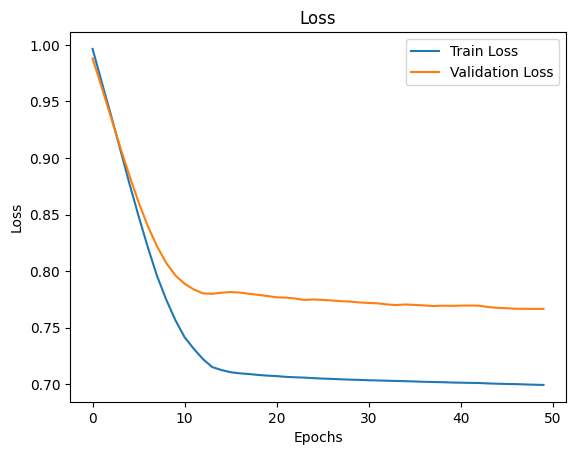

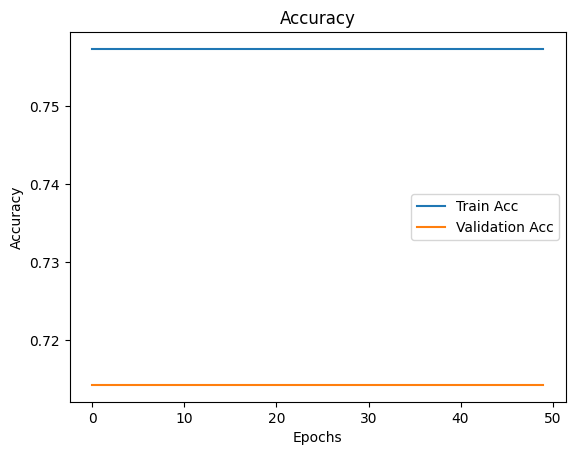

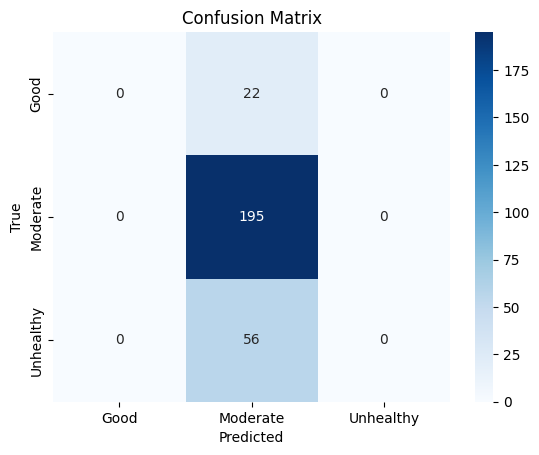

CNN Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


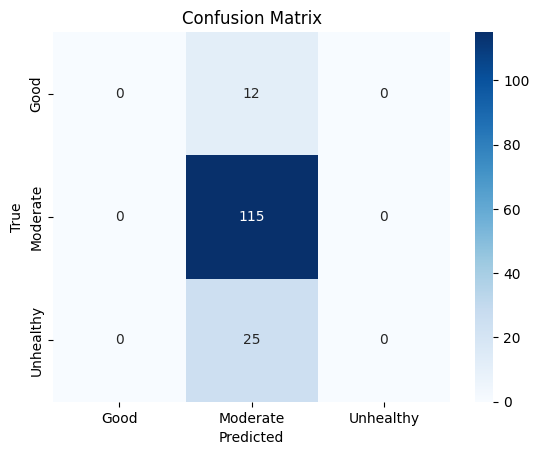


---- Training on Fold 3 ----

Early stopping occurred at epoch 15 with best_epoch = 5 and best_valid_accuracy = 0.91575
TabNet train and validation
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        21
           1     0.9048    0.9952    0.9478       210
           2     0.9762    0.9762    0.9762        42

    accuracy                         0.9158       273
   macro avg     0.6270    0.6571    0.6413       273
weighted avg     0.8462    0.9158    0.8793       273



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

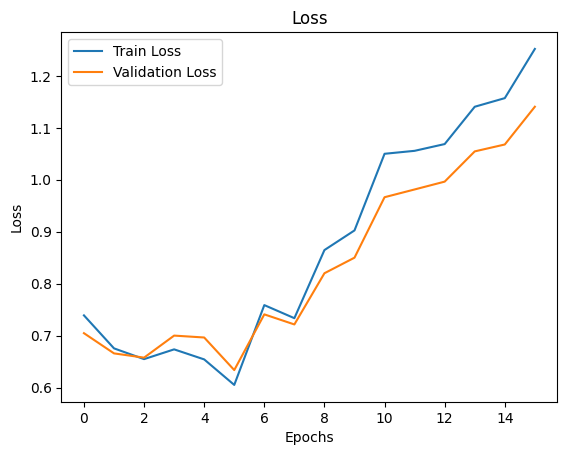

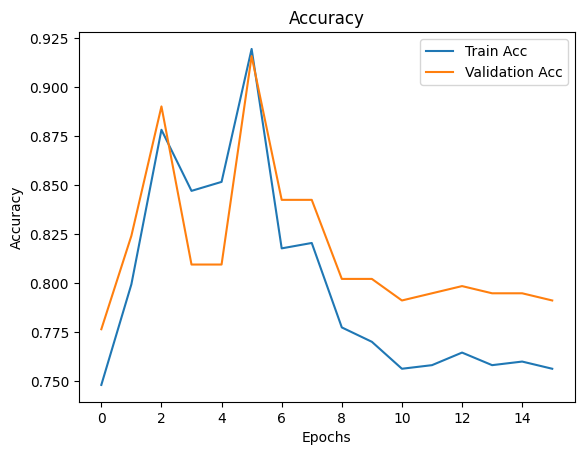

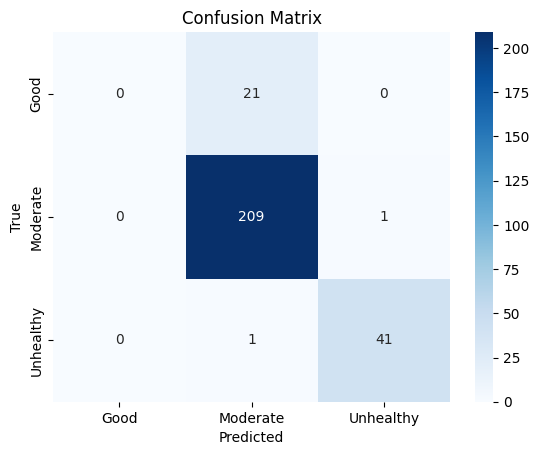

TabNet Test
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.9055    1.0000    0.9504       115
           2     1.0000    1.0000    1.0000        25

    accuracy                         0.9211       152
   macro avg     0.6352    0.6667    0.6501       152
weighted avg     0.8496    0.9211    0.8835       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


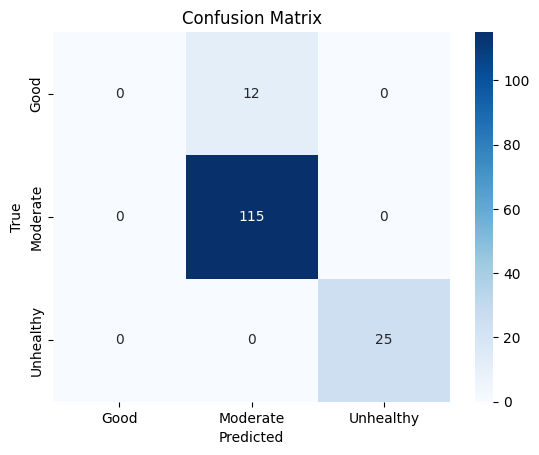

LSTM train and validation
9/9 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        21
           1     0.7692    1.0000    0.8696       210
           2     0.0000    0.0000    0.0000        42

    accuracy                         0.7692       273
   macro avg     0.2564    0.3333    0.2899       273
weighted avg     0.5917    0.7692    0.6689       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


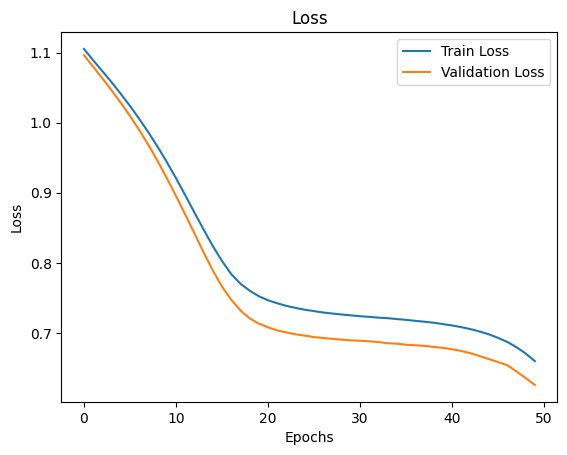

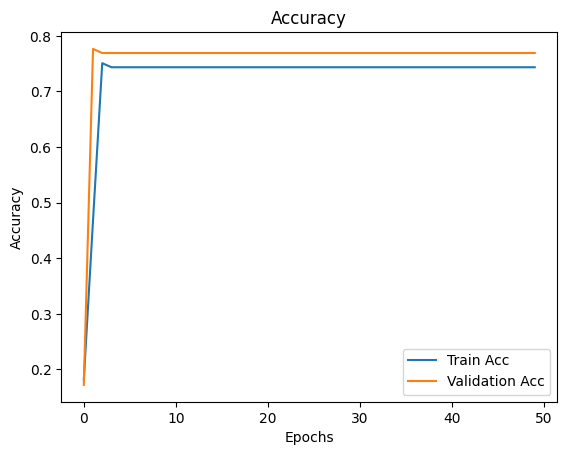

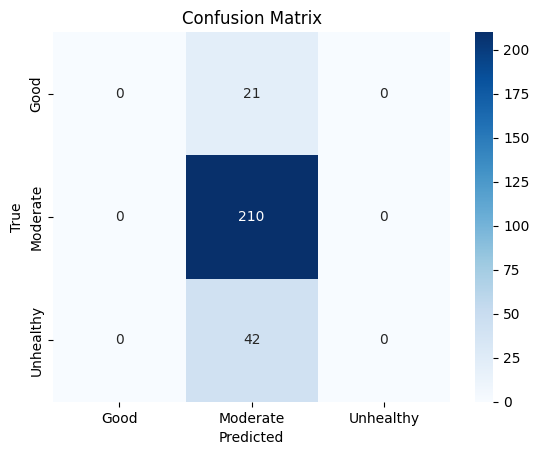

LSTM Test
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


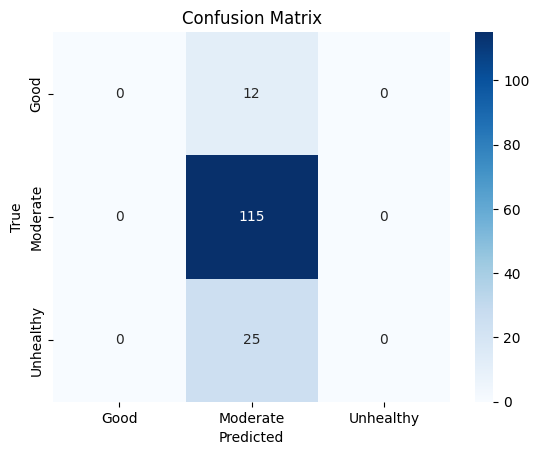

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        21
           1     0.7692    1.0000    0.8696       210
           2     0.0000    0.0000    0.0000        42

    accuracy                         0.7692       273
   macro avg     0.2564    0.3333    0.2899       273
weighted avg     0.5917    0.7692    0.6689       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


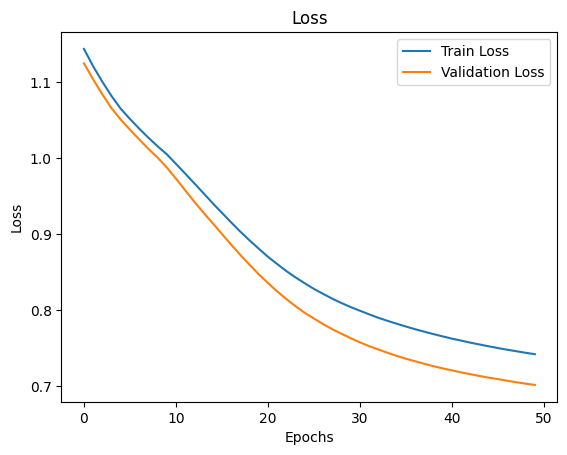

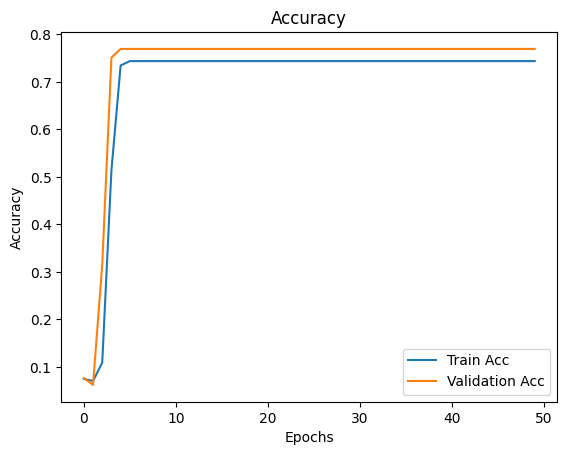

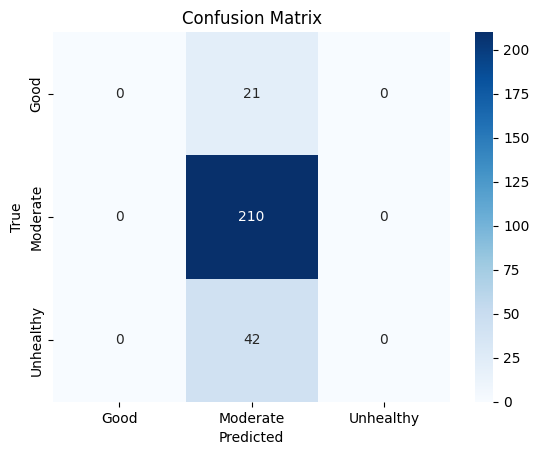

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


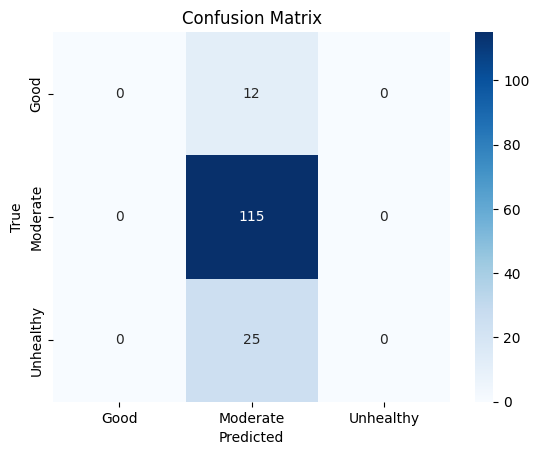


---- Training on Fold 4 ----

Early stopping occurred at epoch 14 with best_epoch = 4 and best_valid_accuracy = 0.87546
TabNet train and validation
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        26
           1     0.8583    1.0000    0.9238       206
           2     1.0000    0.8049    0.8919        41

    accuracy                         0.8755       273
   macro avg     0.6194    0.6016    0.6052       273
weighted avg     0.7979    0.8755    0.8310       273



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

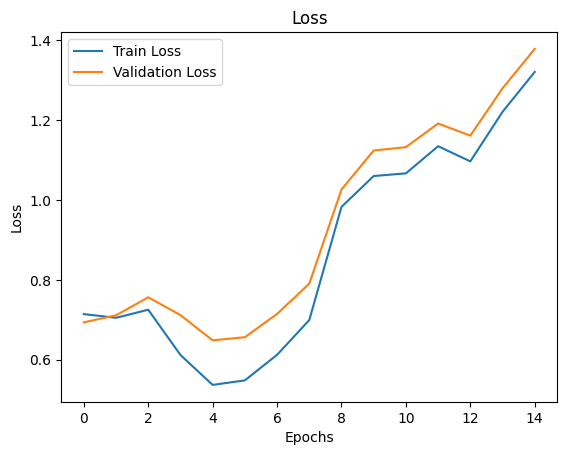

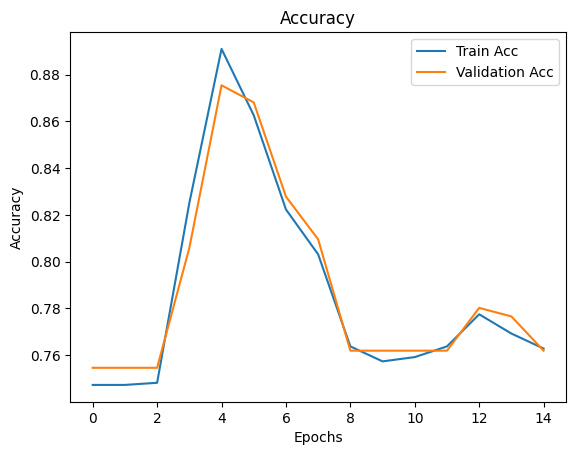

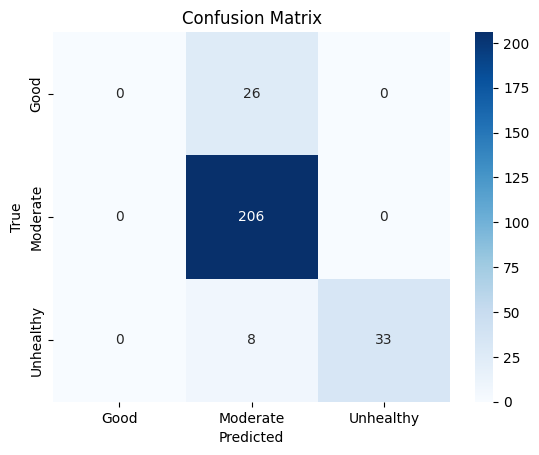

TabNet Test
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.8769    0.9913    0.9306       115
           2     0.9545    0.8400    0.8936        25

    accuracy                         0.8882       152
   macro avg     0.6105    0.6104    0.6081       152
weighted avg     0.8205    0.8882    0.8511       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


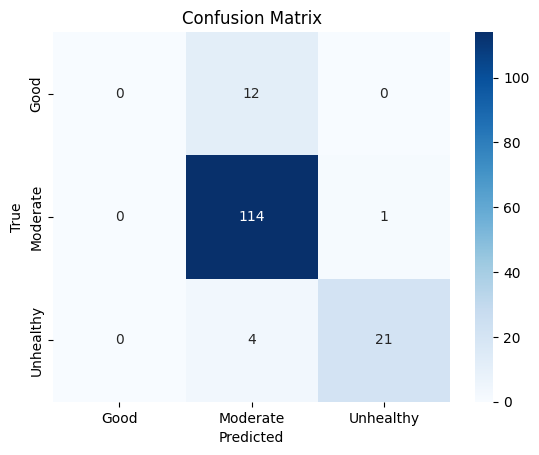

LSTM train and validation
9/9 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        26
           1     0.7546    1.0000    0.8601       206
           2     0.0000    0.0000    0.0000        41

    accuracy                         0.7546       273
   macro avg     0.2515    0.3333    0.2867       273
weighted avg     0.5694    0.7546    0.6490       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


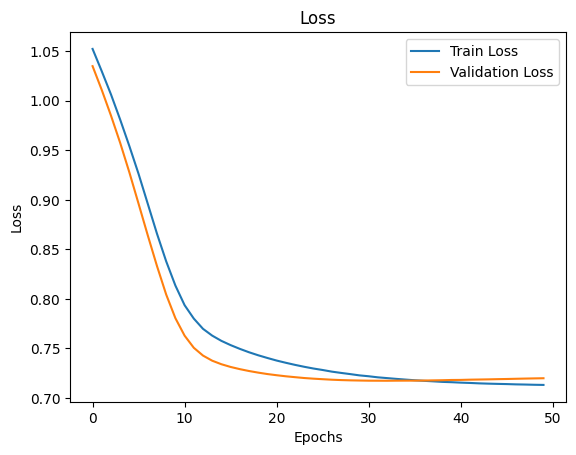

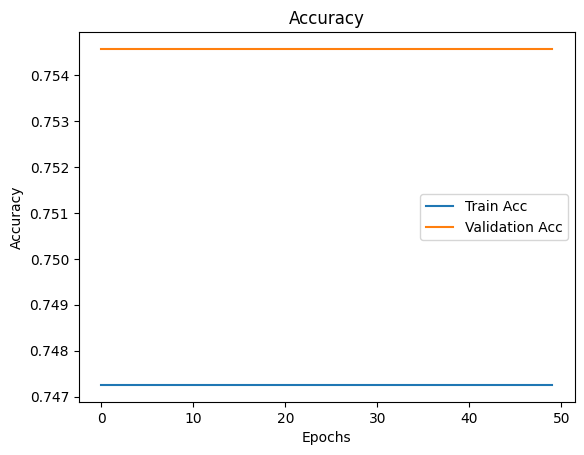

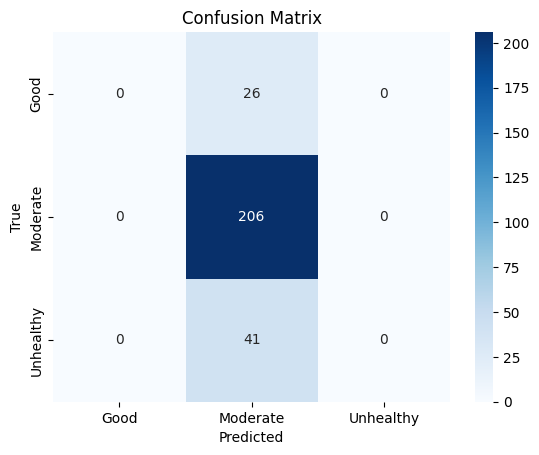

LSTM Test
5/5 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


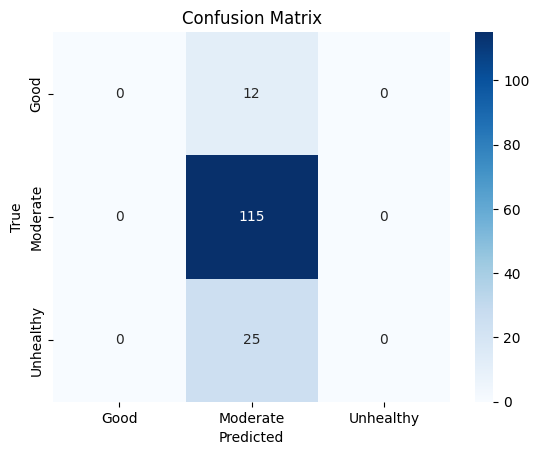

CNN train and validation
9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        26
           1     0.7546    1.0000    0.8601       206
           2     0.0000    0.0000    0.0000        41

    accuracy                         0.7546       273
   macro avg     0.2515    0.3333    0.2867       273
weighted avg     0.5694    0.7546    0.6490       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


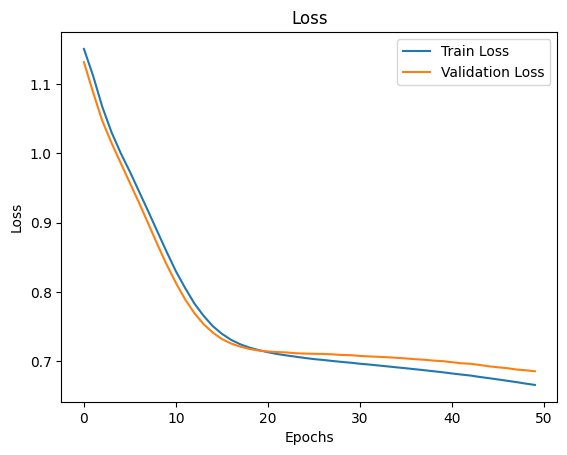

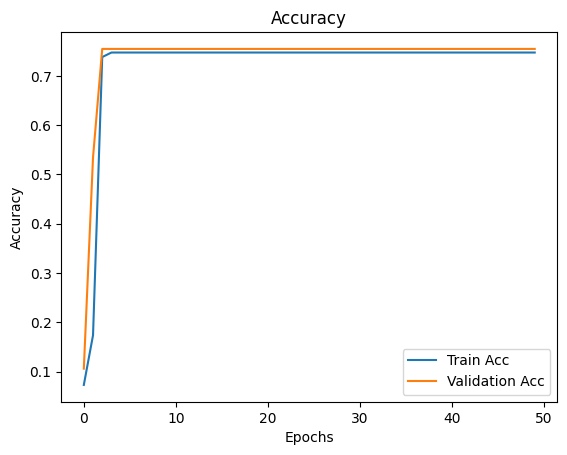

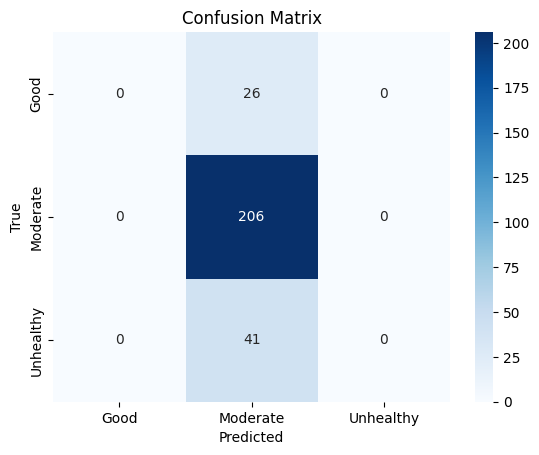

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


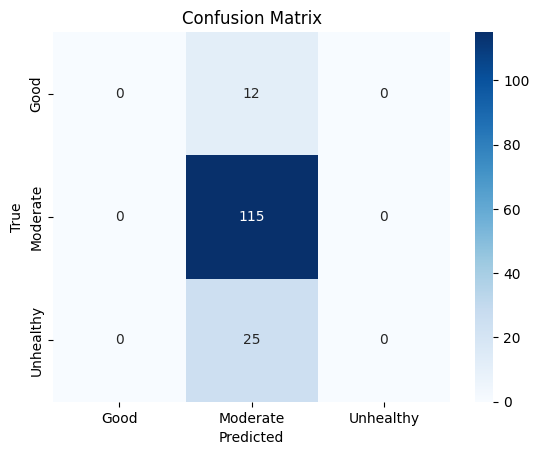


---- Training on Fold 5 ----

Early stopping occurred at epoch 16 with best_epoch = 6 and best_valid_accuracy = 0.84615
TabNet train and validation
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.8243    1.0000    0.9037       197
           2     1.0000    0.6296    0.7727        54

    accuracy                         0.8462       273
   macro avg     0.6081    0.5432    0.5588       273
weighted avg     0.7926    0.8462    0.8049       273



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

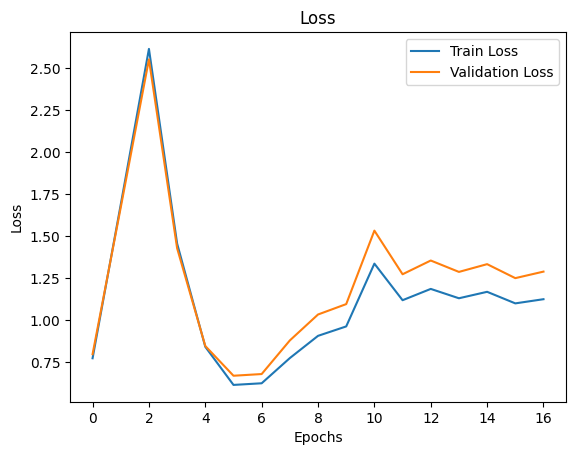

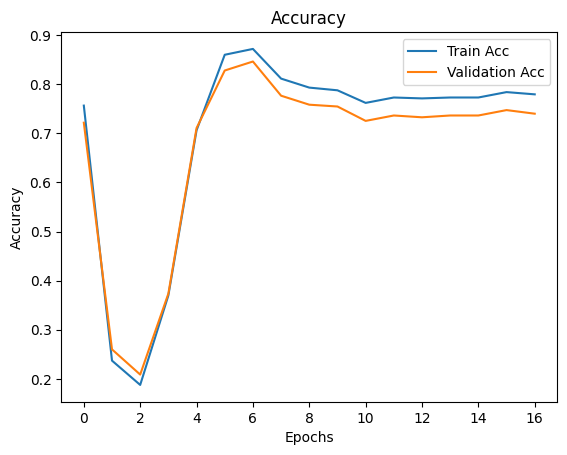

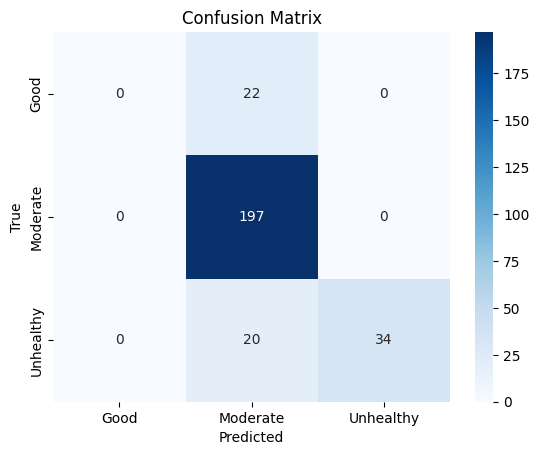

TabNet Test
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.8582    1.0000    0.9237       115
           2     1.0000    0.7200    0.8372        25

    accuracy                         0.8750       152
   macro avg     0.6194    0.5733    0.5870       152
weighted avg     0.8138    0.8750    0.8365       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


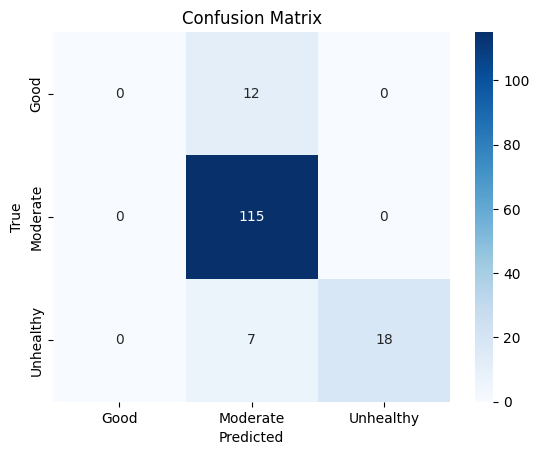

LSTM train and validation
9/9 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.7216    1.0000    0.8383       197
           2     0.0000    0.0000    0.0000        54

    accuracy                         0.7216       273
   macro avg     0.2405    0.3333    0.2794       273
weighted avg     0.5207    0.7216    0.6049       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


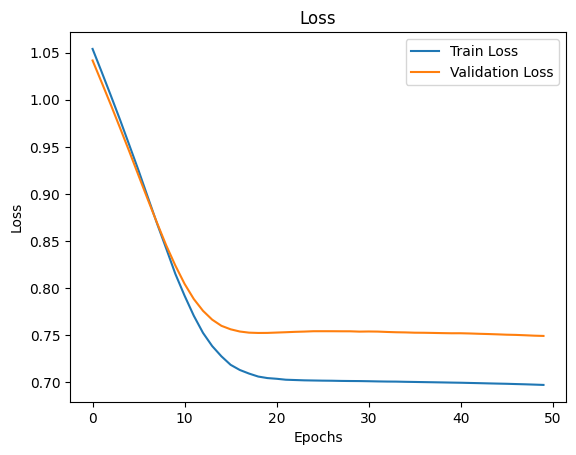

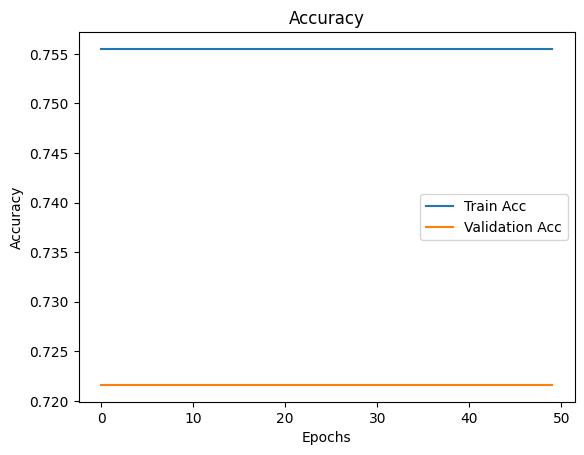

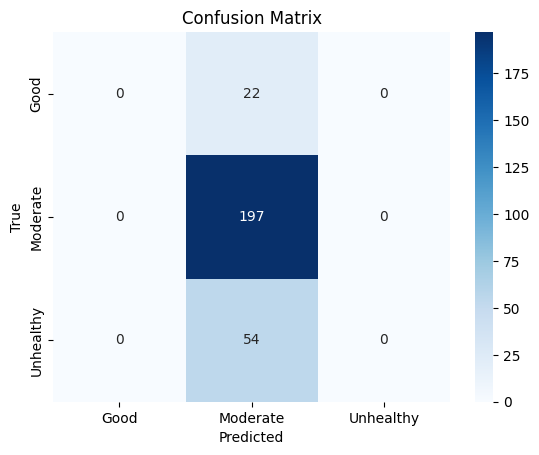

LSTM Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


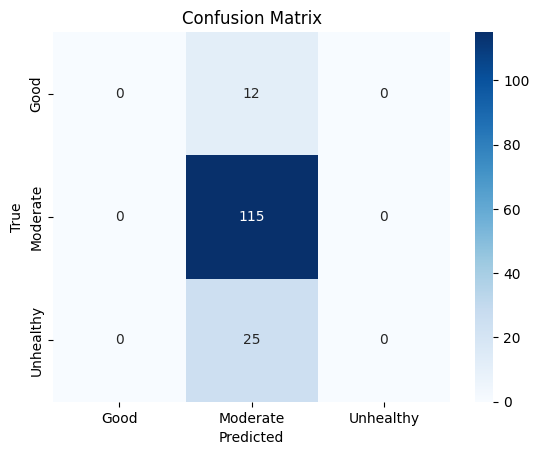

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.7216    1.0000    0.8383       197
           2     0.0000    0.0000    0.0000        54

    accuracy                         0.7216       273
   macro avg     0.2405    0.3333    0.2794       273
weighted avg     0.5207    0.7216    0.6049       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


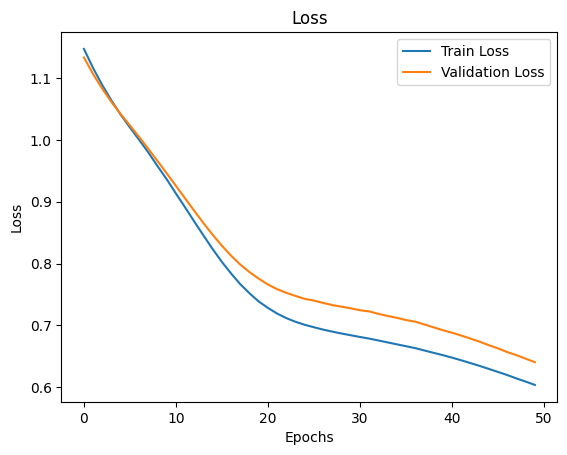

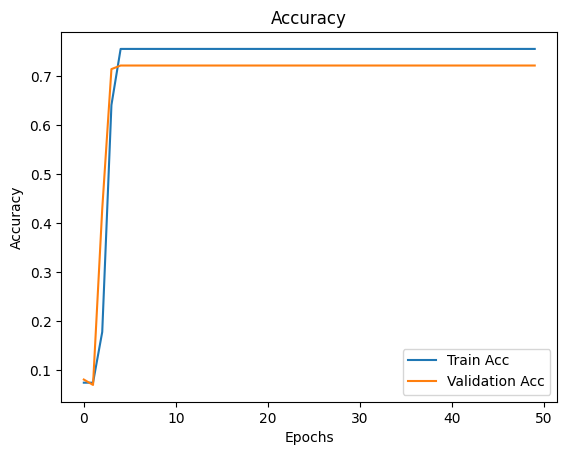

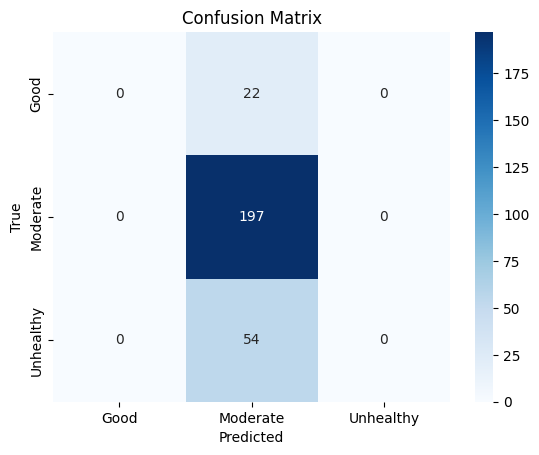

CNN Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


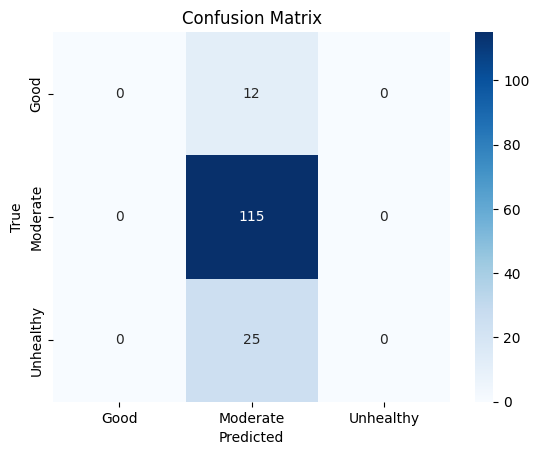


LSTM Average accuracy over 5-fold CV: 74.87%
CNN Average accuracy over 5-fold CV: 74.87%
Tabnet Average accuracy over 5-fold CV: 87.47%


In [ ]:
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=9)
aug = ClassificationSMOTE(p=0.2)

acc_per_fold_lstm = []
acc_per_fold_cnn = []
acc_per_fold_tabnet = []

y_test_10_tabnet = np.argmax(y_test_10, axis=1)

for fold, (train, test) in enumerate(kfold.split(X_train_90, np.argmax(y_train_90, axis=1))):
    print(f"\n---- Training on Fold {fold + 1} ----")

    model_lstm = create_lstm_model()
    model_cnn = create_cnn_model()

    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    y_train_tabnet = np.argmax(y_train, axis=1)
    y_test_tabnet = np.argmax(y_test, axis=1)

    #BEGIN Tabnet
    clf.fit(
        X_train, y_train_tabnet,
        eval_set=[(X_train, y_train_tabnet), (X_test, y_test_tabnet)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss', 'accuracy'],
        max_epochs=50,
        batch_size=128
    )

    predictions = clf.predict(X_test)
    accuracy = np.mean(predictions == y_test_tabnet)
    confusion = confusion_matrix(y_test_tabnet, predictions, labels=[0, 1, 2])    # Calculate the confusion matrix
    acc_per_fold_tabnet.append(accuracy * 100)
    print("TabNet train and validation")
    print(classification_report(y_test_tabnet, predictions, digits=4))
    create_grafik (
        train_loss=clf.history['train_logloss'],
        valid_loss=clf.history['valid_logloss'],
        train_accuracy=clf.history['train_accuracy'],
        valid_accuracy=clf.history['valid_accuracy']
    )
    createConfusionMatrix(confusion)

    predictions = clf.predict(X_test_10)
    # accuracy = np.mean(predictions == y_test_10_tabnet)
    print("TabNet Test")
    print(classification_report(y_test_10_tabnet, predictions, digits=4))
    confusion = confusion_matrix(y_test_10_tabnet, predictions, labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #END Tabnet

    #BEGIN LSTM
    history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))

    print("LSTM train and validation")
    scores = model_lstm.evaluate(X_test, y_test, verbose=0)
    acc_per_fold_lstm.append(scores[1] * 100)
    y_test_int = np.argmax(y_test, axis=1)
    y_pred = model_lstm.predict(X_test)
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    create_grafik (
        valid_loss=history_lstm.history['val_loss'],
        train_loss=history_lstm.history['loss'],
        train_accuracy=history_lstm.history['accuracy'],
        valid_accuracy=history_lstm.history['val_accuracy'],
    )
    createConfusionMatrix(confusion)

    print("LSTM Test")
    y_test_int = np.argmax(y_test_10, axis=1)
    y_pred = model_lstm.predict(X_test_10)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #END LSTM


    #BEGIN CNN
    history_cnn = model_cnn.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))
    print("CNN train and validation")
    scores = model_cnn.evaluate(X_test, y_test, verbose=0)
    acc_per_fold_cnn.append(scores[1] * 100)
    y_pred = model_cnn.predict(X_test)
    y_test_int = np.argmax(y_test, axis=1)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    create_grafik (
        valid_loss=history_cnn.history['val_loss'],
        train_loss=history_cnn.history['loss'],
        train_accuracy=history_cnn.history['accuracy'],
        valid_accuracy=history_cnn.history['val_accuracy'],
    )
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    print("CNN Test")
    y_test_int = np.argmax(y_test_10, axis=1)
    y_pred = model_cnn.predict(X_test_10)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #--END report--#

print(
    f"\nLSTM Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_lstm):.2f}%")

print(
    f"CNN Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_cnn):.2f}%")

print(
    f"Tabnet Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_tabnet):.2f}%")



---- Training on Fold 1 ----
Stop training because you reached max_epochs = 75 with best_epoch = 39 and best_valid_accuracy = 0.97802


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet train and validation
              precision    recall  f1-score   support

           0     0.9600    0.9600    0.9600        25
           1     0.9894    0.9791    0.9842       191
           2     0.9492    0.9825    0.9655        57

    accuracy                         0.9780       273
   macro avg     0.9662    0.9738    0.9699       273
weighted avg     0.9783    0.9780    0.9781       273



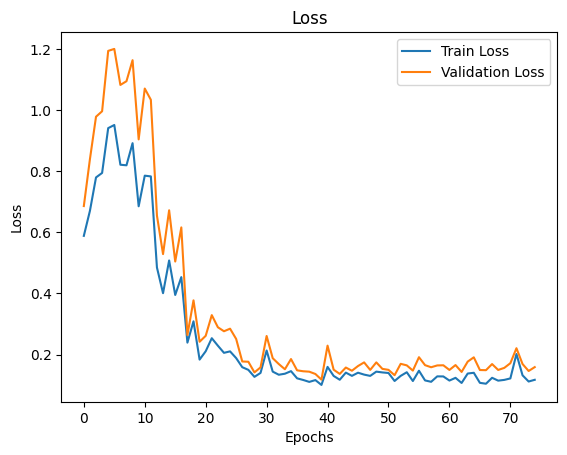

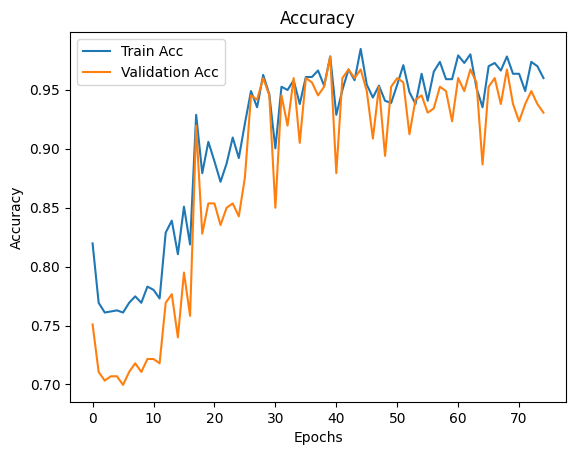

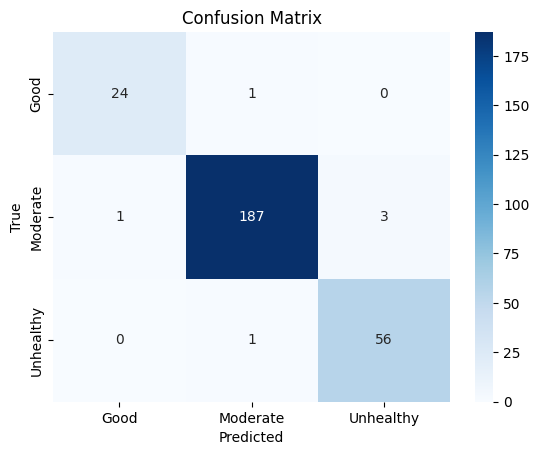

TabNet Test
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     0.9914    1.0000    0.9957       115
           2     1.0000    0.9600    0.9796        25

    accuracy                         0.9934       152
   macro avg     0.9971    0.9867    0.9918       152
weighted avg     0.9935    0.9934    0.9934       152



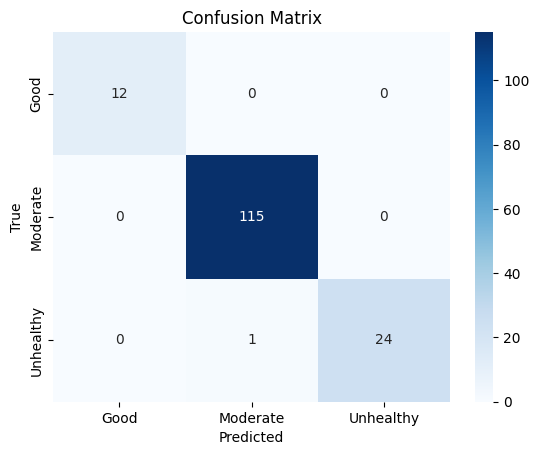

LSTM train and validation
9/9 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        25
           1     0.6996    1.0000    0.8233       191
           2     0.0000    0.0000    0.0000        57

    accuracy                         0.6996       273
   macro avg     0.2332    0.3333    0.2744       273
weighted avg     0.4895    0.6996    0.5760       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


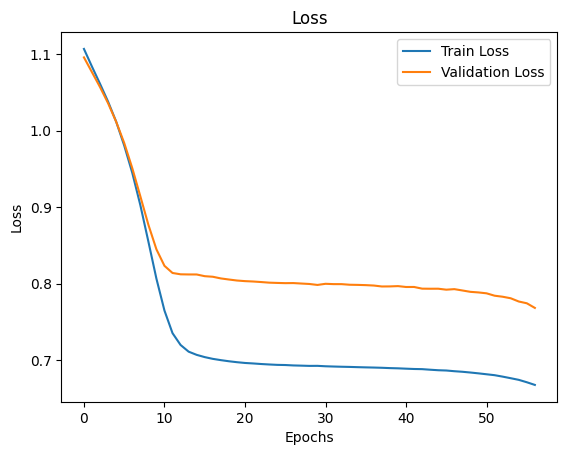

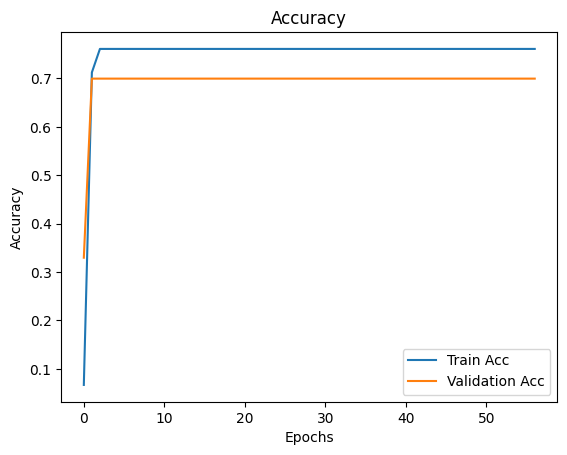

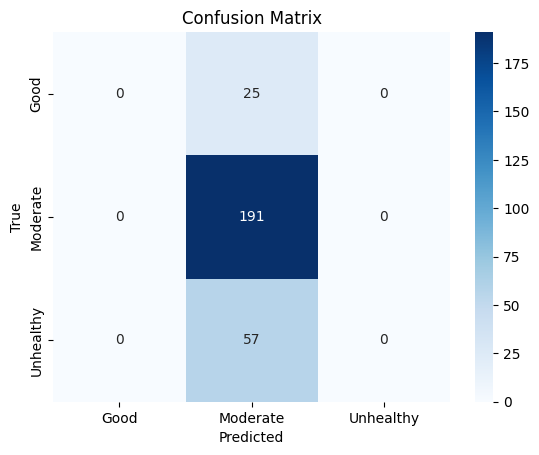

LSTM Test
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


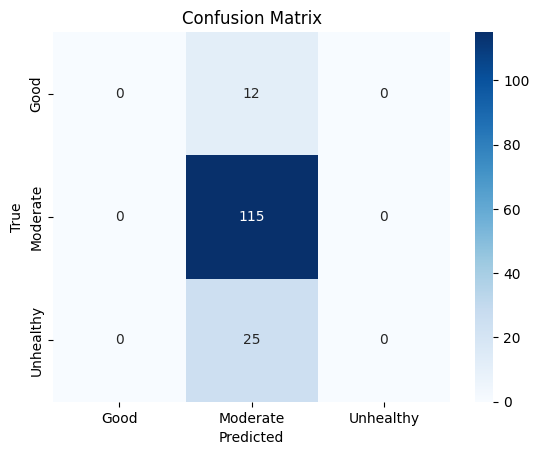

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     1.0000    0.6800    0.8095        25
           1     0.8761    1.0000    0.9340       191
           2     1.0000    0.6667    0.8000        57

    accuracy                         0.9011       273
   macro avg     0.9587    0.7822    0.8478       273
weighted avg     0.9133    0.9011    0.8946       273



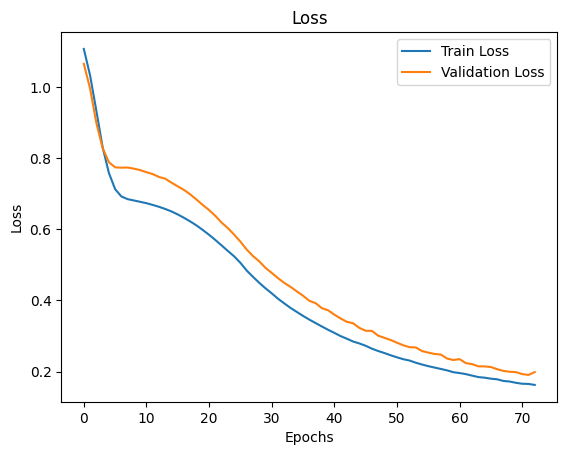

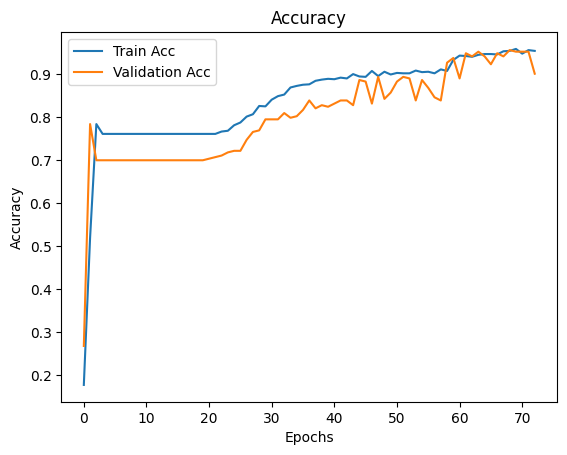

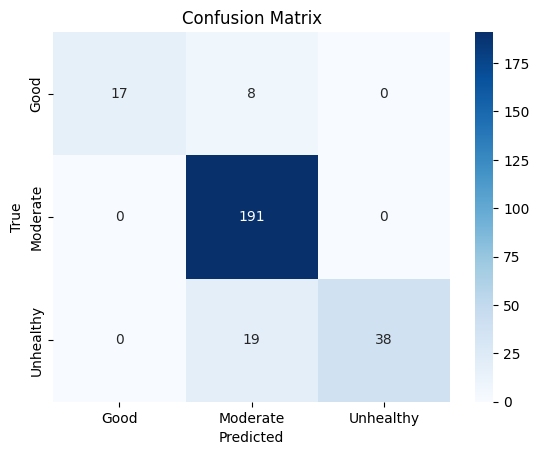

CNN Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     1.0000    0.8333    0.9091        12
           1     0.9583    1.0000    0.9787       115
           2     1.0000    0.8800    0.9362        25

    accuracy                         0.9671       152
   macro avg     0.9861    0.9044    0.9413       152
weighted avg     0.9685    0.9671    0.9662       152



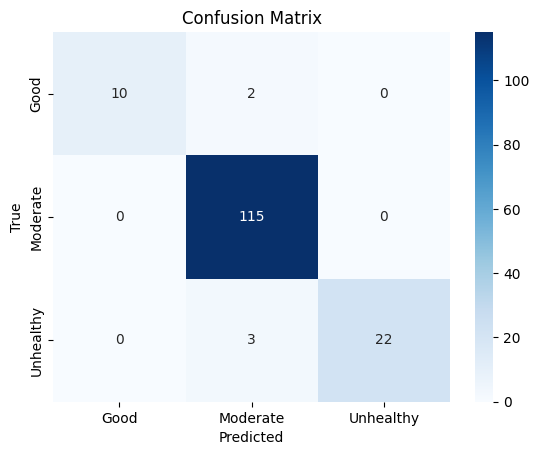


---- Training on Fold 2 ----
Stop training because you reached max_epochs = 75 with best_epoch = 56 and best_valid_accuracy = 0.97802


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet train and validation
              precision    recall  f1-score   support

           0     0.9500    0.9048    0.9268        21
           1     0.9773    0.9954    0.9862       216
           2     1.0000    0.9167    0.9565        36

    accuracy                         0.9780       273
   macro avg     0.9758    0.9389    0.9565       273
weighted avg     0.9782    0.9780    0.9777       273



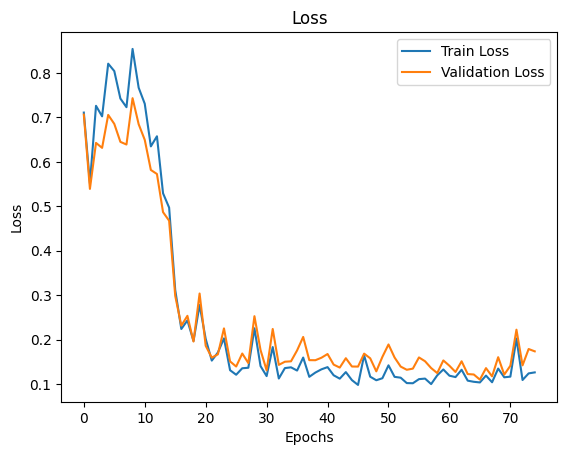

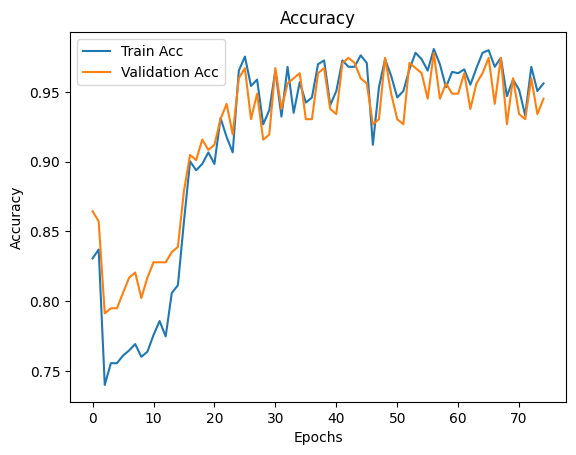

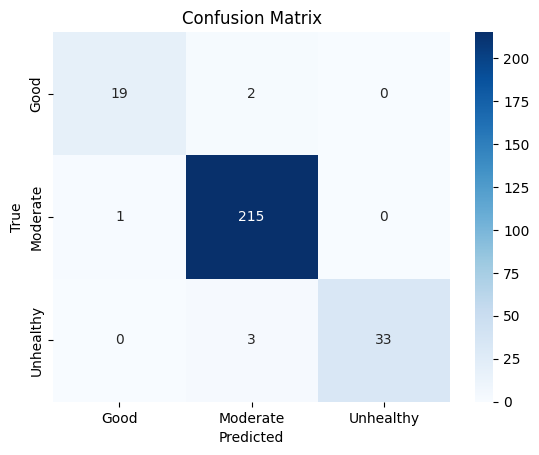

TabNet Test
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     0.9914    1.0000    0.9957       115
           2     1.0000    0.9600    0.9796        25

    accuracy                         0.9934       152
   macro avg     0.9971    0.9867    0.9918       152
weighted avg     0.9935    0.9934    0.9934       152



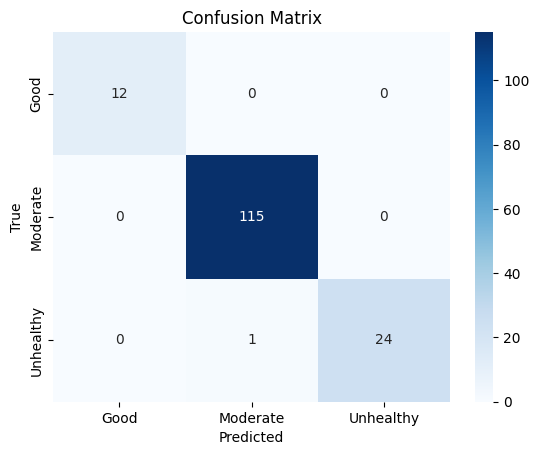

LSTM train and validation
9/9 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        21
           1     0.7912    1.0000    0.8834       216
           2     0.0000    0.0000    0.0000        36

    accuracy                         0.7912       273
   macro avg     0.2637    0.3333    0.2945       273
weighted avg     0.6260    0.7912    0.6990       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


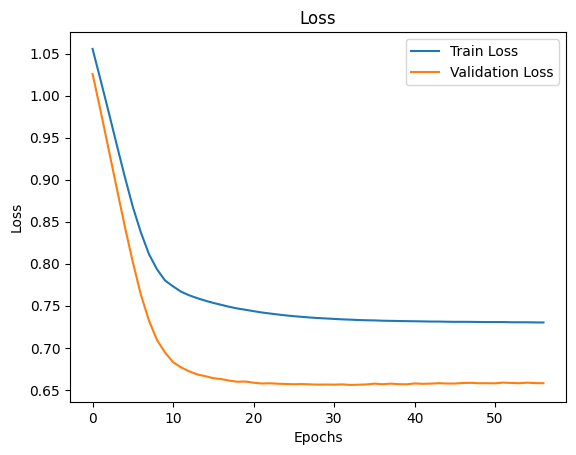

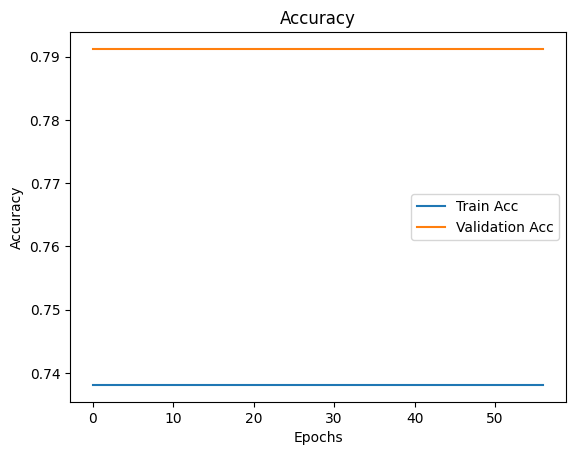

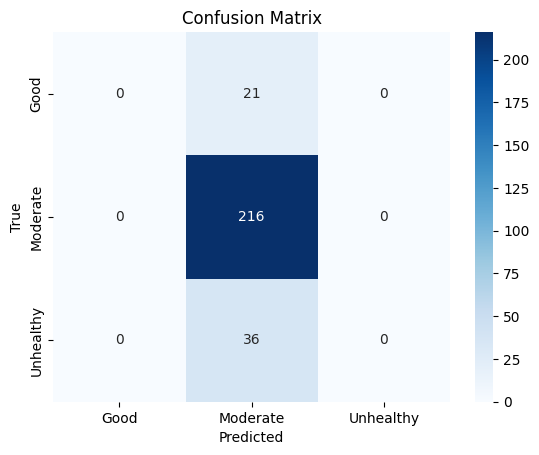

LSTM Test
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


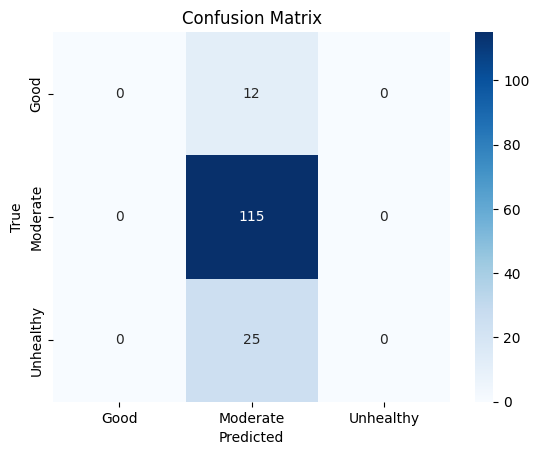

CNN train and validation
9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9412    0.7619    0.8421        21
           1     0.9591    0.9769    0.9679       216
           2     0.8889    0.8889    0.8889        36

    accuracy                         0.9487       273
   macro avg     0.9297    0.8759    0.8996       273
weighted avg     0.9485    0.9487    0.9478       273



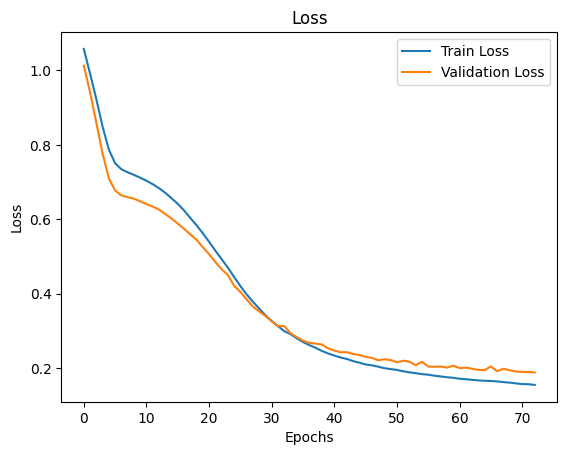

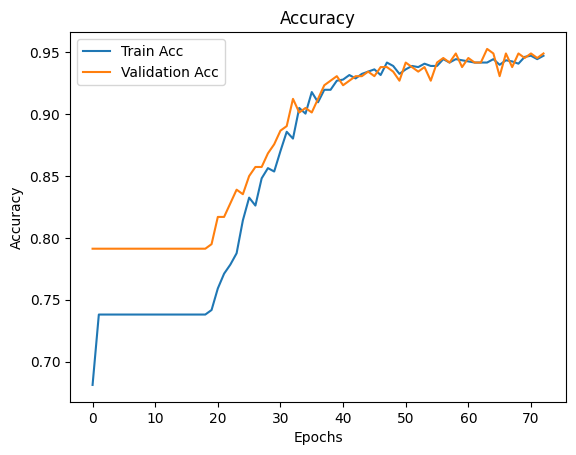

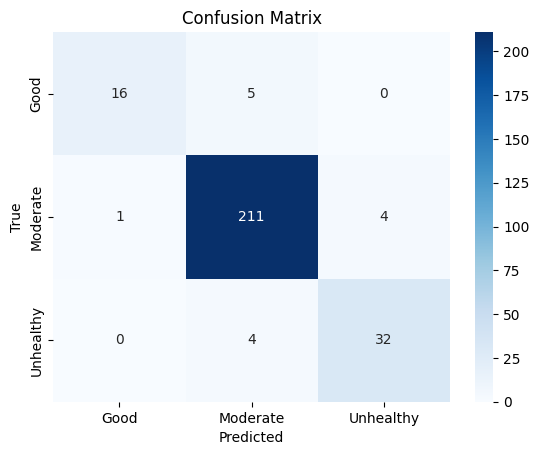

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        12
           1     0.9741    0.9826    0.9784       115
           2     0.9200    0.9200    0.9200        25

    accuracy                         0.9671       152
   macro avg     0.9647    0.9398    0.9516       152
weighted avg     0.9673    0.9671    0.9670       152



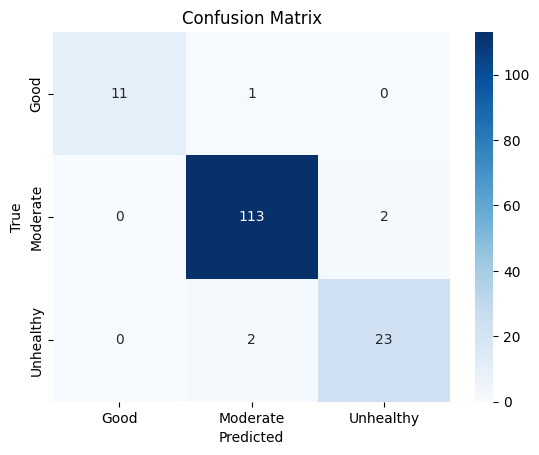


---- Training on Fold 3 ----
Stop training because you reached max_epochs = 75 with best_epoch = 30 and best_valid_accuracy = 0.99267


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet train and validation
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9909    1.0000    0.9954       217
           2     1.0000    0.9512    0.9750        41

    accuracy                         0.9927       273
   macro avg     0.9970    0.9837    0.9901       273
weighted avg     0.9927    0.9927    0.9926       273



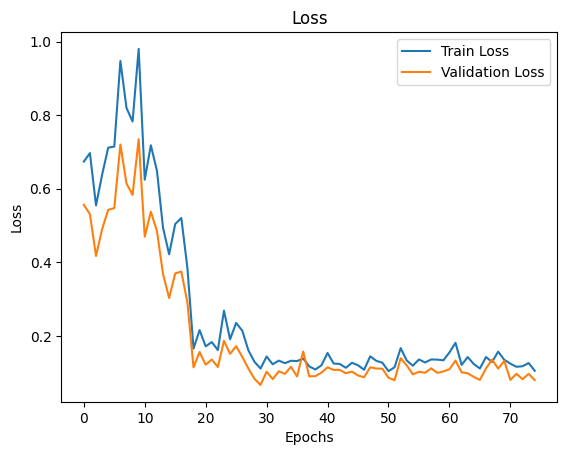

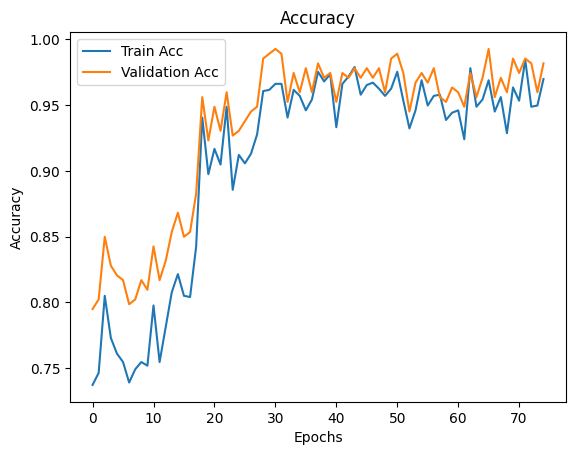

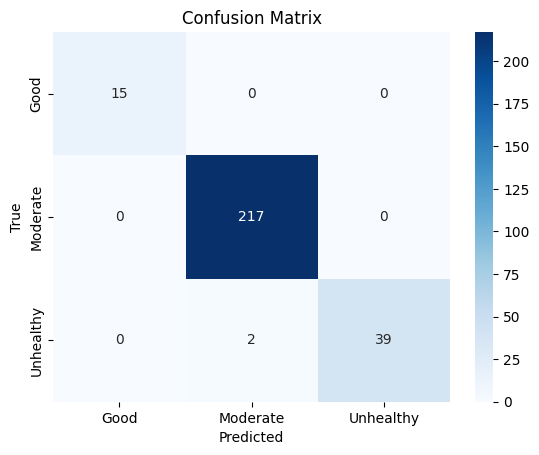

TabNet Test
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        12
           1     0.9664    1.0000    0.9829       115
           2     1.0000    0.8800    0.9362        25

    accuracy                         0.9737       152
   macro avg     0.9888    0.9322    0.9585       152
weighted avg     0.9746    0.9737    0.9731       152



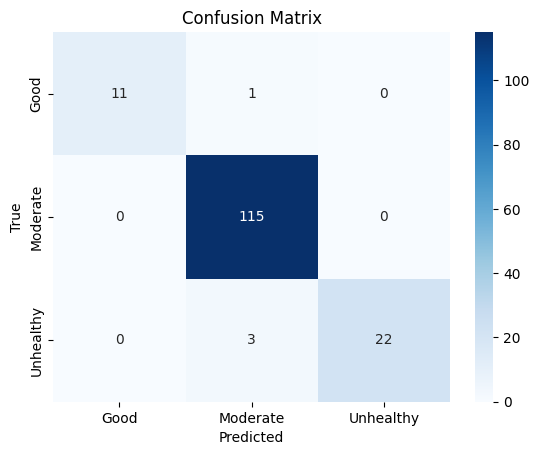

LSTM train and validation
9/9 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        15
           1     0.7949    1.0000    0.8857       217
           2     0.0000    0.0000    0.0000        41

    accuracy                         0.7949       273
   macro avg     0.2650    0.3333    0.2952       273
weighted avg     0.6318    0.7949    0.7040       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


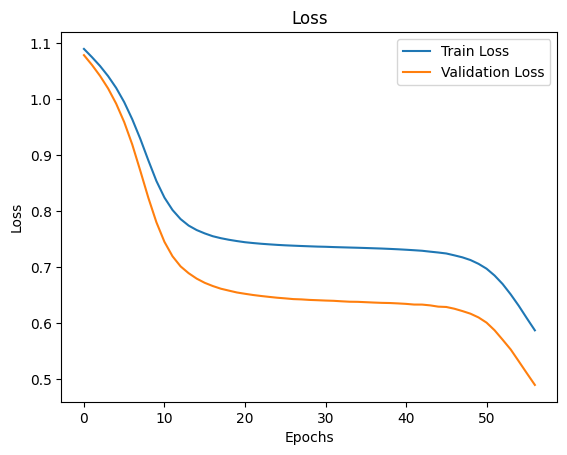

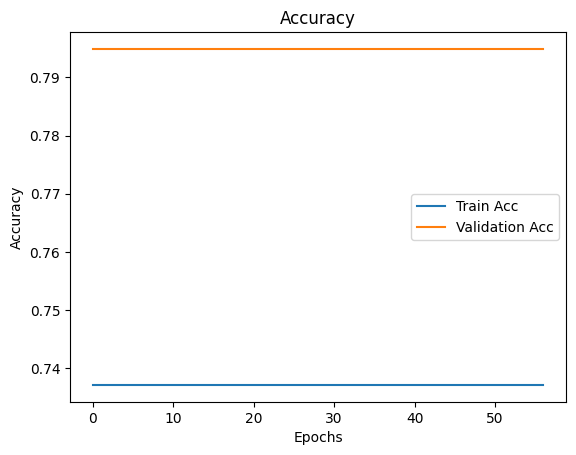

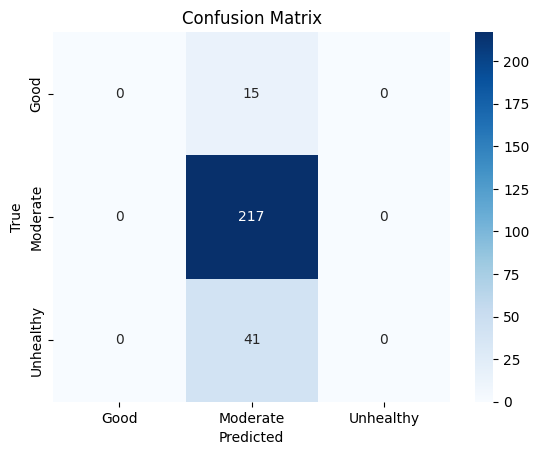

LSTM Test
5/5 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


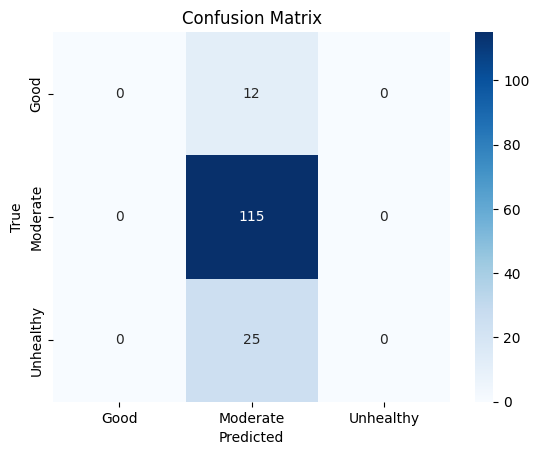

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     1.0000    0.4000    0.5714        15
           1     0.9353    1.0000    0.9666       217
           2     1.0000    0.8537    0.9211        41

    accuracy                         0.9451       273
   macro avg     0.9784    0.7512    0.8197       273
weighted avg     0.9486    0.9451    0.9380       273



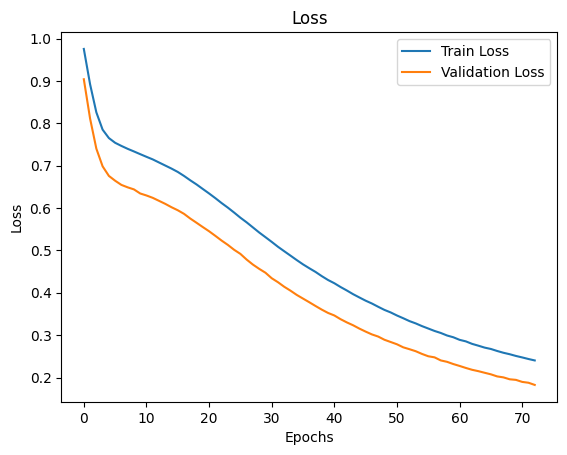

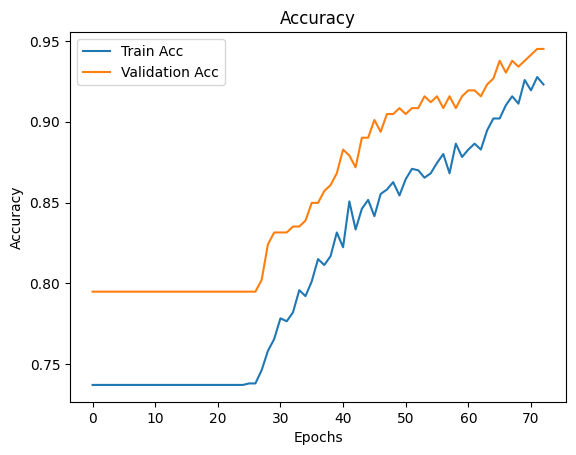

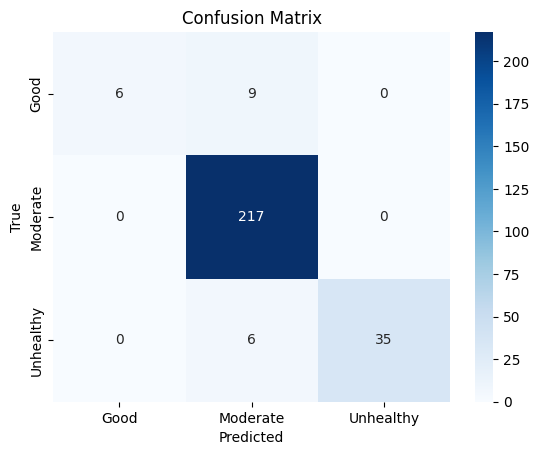

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     1.0000    0.5833    0.7368        12
           1     0.9504    1.0000    0.9746       115
           2     1.0000    0.9600    0.9796        25

    accuracy                         0.9605       152
   macro avg     0.9835    0.8478    0.8970       152
weighted avg     0.9625    0.9605    0.9566       152



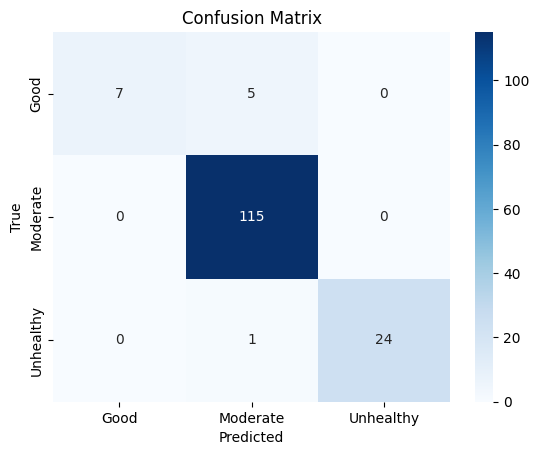


---- Training on Fold 4 ----
Stop training because you reached max_epochs = 75 with best_epoch = 54 and best_valid_accuracy = 0.98168


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet train and validation
              precision    recall  f1-score   support

           0     0.9091    0.9524    0.9302        21
           1     0.9852    0.9901    0.9877       202
           2     1.0000    0.9600    0.9796        50

    accuracy                         0.9817       273
   macro avg     0.9648    0.9675    0.9658       273
weighted avg     0.9821    0.9817    0.9818       273



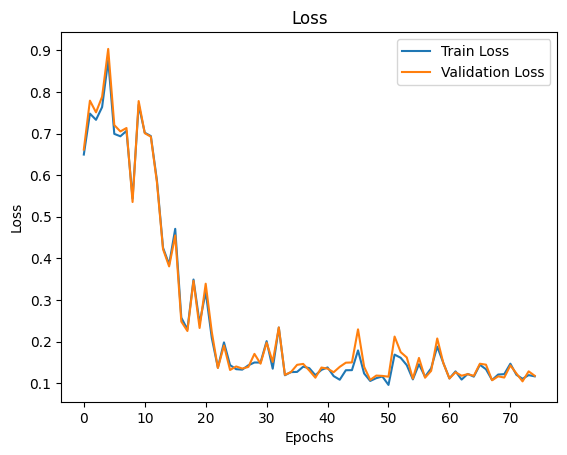

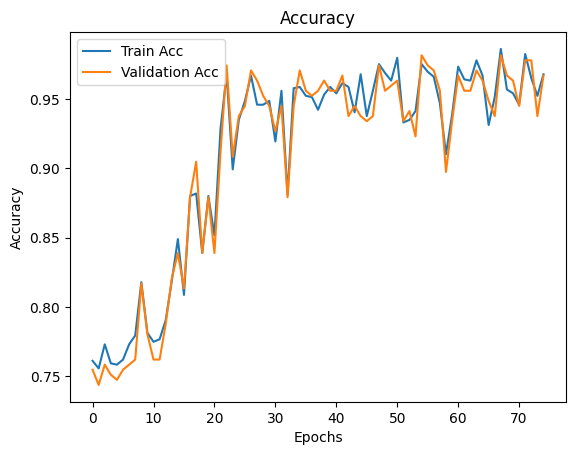

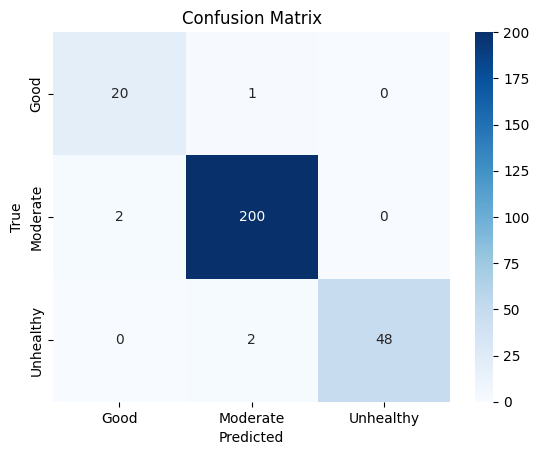

TabNet Test
              precision    recall  f1-score   support

           0     0.9231    1.0000    0.9600        12
           1     0.9913    0.9913    0.9913       115
           2     1.0000    0.9600    0.9796        25

    accuracy                         0.9868       152
   macro avg     0.9715    0.9838    0.9770       152
weighted avg     0.9873    0.9868    0.9869       152



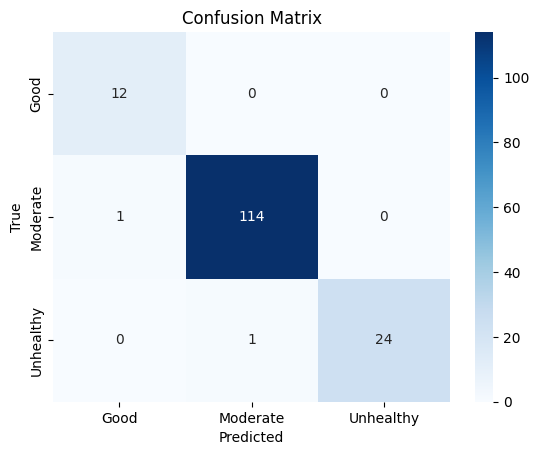

LSTM train and validation
9/9 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.9231    0.5714    0.7059        21
           1     0.9045    0.8911    0.8978       202
           2     0.6557    0.8000    0.7207        50

    accuracy                         0.8498       273
   macro avg     0.8278    0.7542    0.7748       273
weighted avg     0.8604    0.8498    0.8506       273



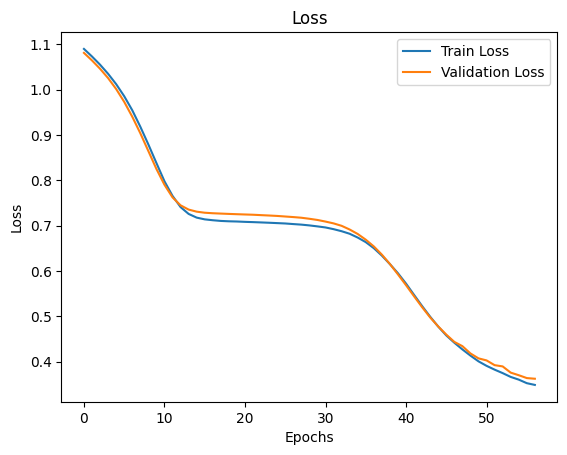

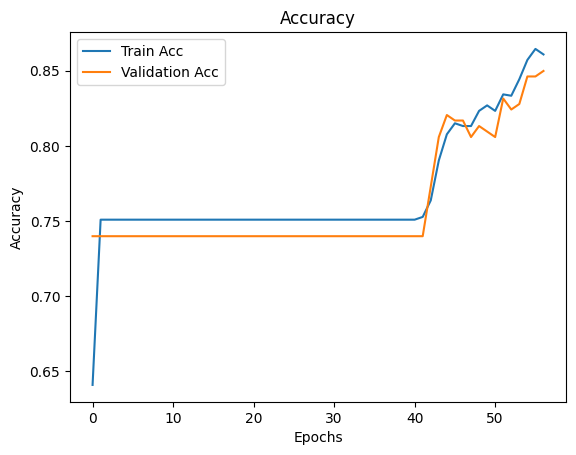

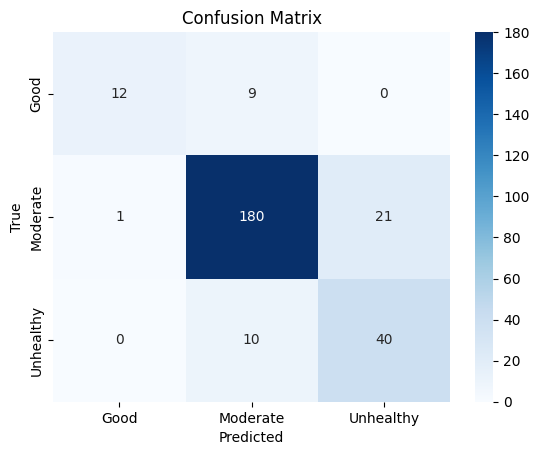

LSTM Test
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.8750    0.5833    0.7000        12
           1     0.9083    0.9478    0.9277       115
           2     0.7917    0.7600    0.7755        25

    accuracy                         0.8882       152
   macro avg     0.8583    0.7637    0.8011       152
weighted avg     0.8865    0.8882    0.8847       152



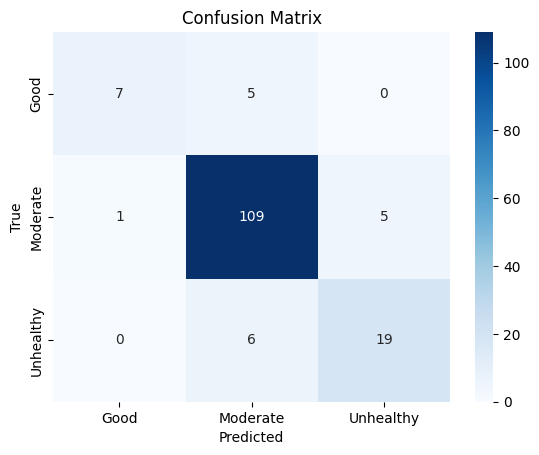

CNN train and validation
9/9 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     0.9286    0.6190    0.7429        21
           1     0.9306    0.9950    0.9617       202
           2     1.0000    0.8600    0.9247        50

    accuracy                         0.9414       273
   macro avg     0.9530    0.8247    0.8764       273
weighted avg     0.9431    0.9414    0.9381       273



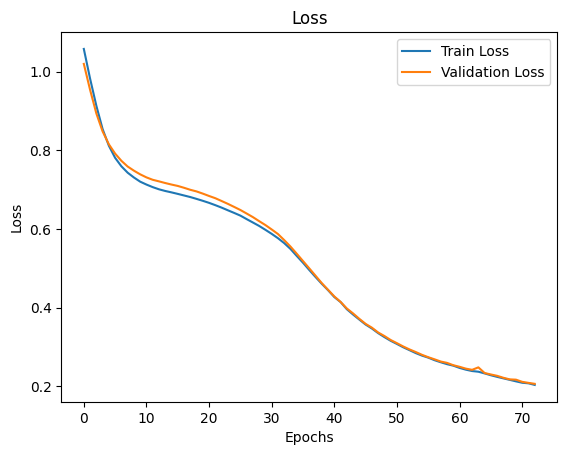

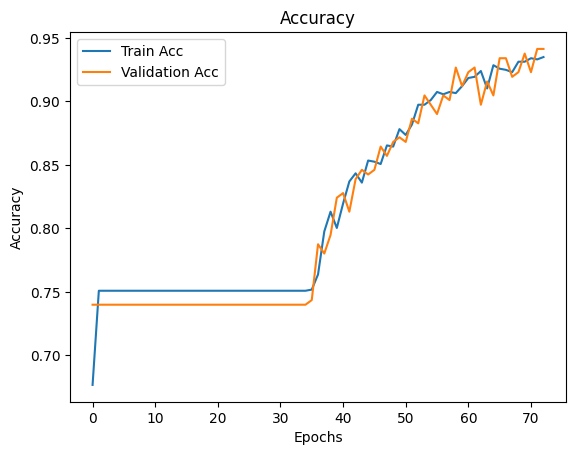

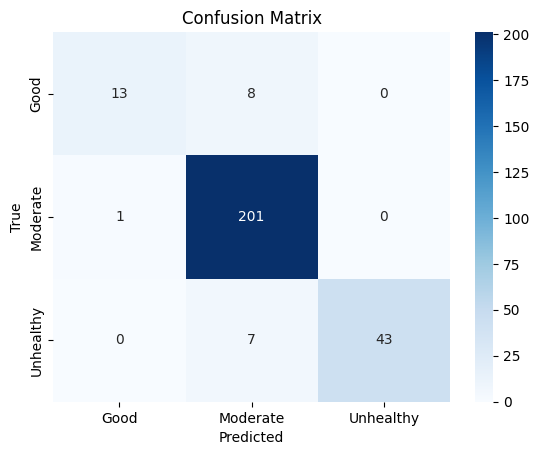

CNN Test
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     1.0000    0.8333    0.9091        12
           1     0.9661    0.9913    0.9785       115
           2     0.9583    0.9200    0.9388        25

    accuracy                         0.9671       152
   macro avg     0.9748    0.9149    0.9421       152
weighted avg     0.9675    0.9671    0.9665       152



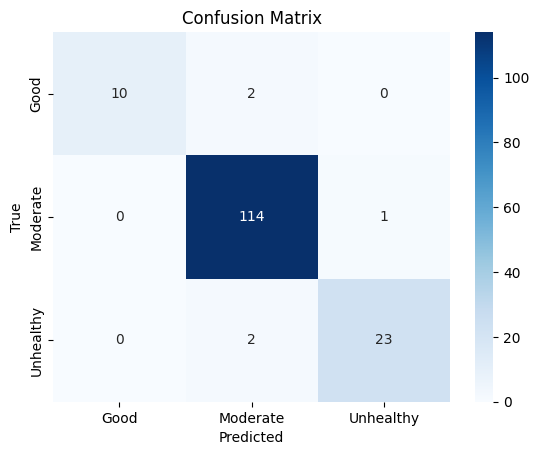


---- Training on Fold 5 ----
Stop training because you reached max_epochs = 75 with best_epoch = 29 and best_valid_accuracy = 0.96337


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet train and validation
              precision    recall  f1-score   support

           0     0.8333    0.7143    0.7692        21
           1     0.9650    0.9847    0.9747       196
           2     1.0000    0.9821    0.9910        56

    accuracy                         0.9634       273
   macro avg     0.9328    0.8937    0.9117       273
weighted avg     0.9621    0.9634    0.9623       273



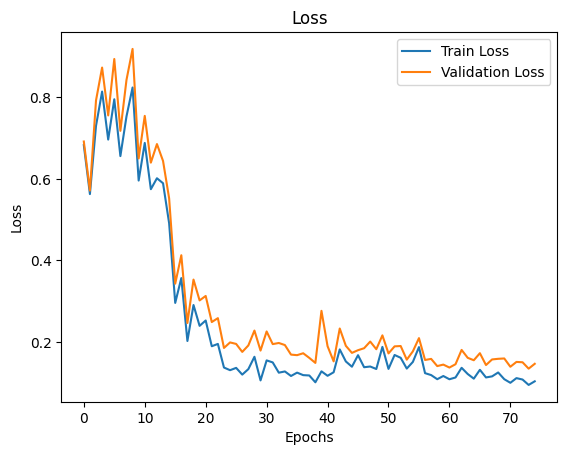

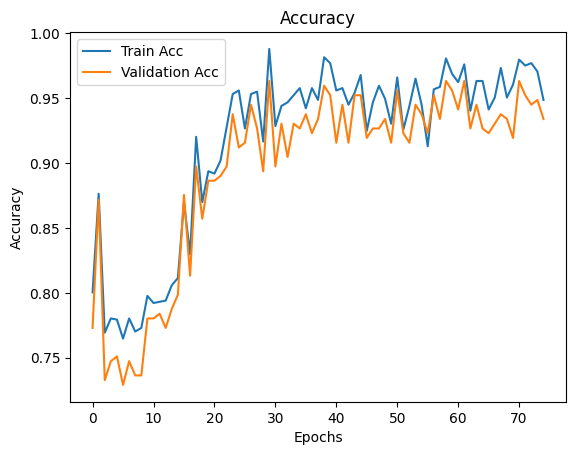

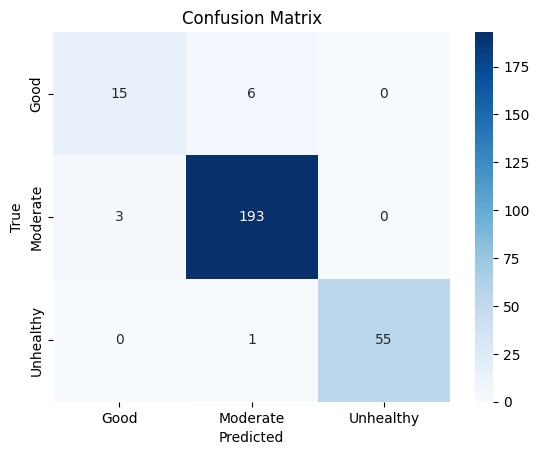

TabNet Test
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000       115
           2     1.0000    1.0000    1.0000        25

    accuracy                         1.0000       152
   macro avg     1.0000    1.0000    1.0000       152
weighted avg     1.0000    1.0000    1.0000       152



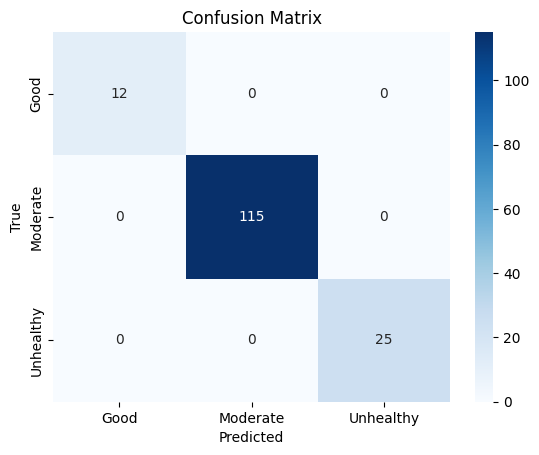

LSTM train and validation
9/9 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        21
           1     0.7179    1.0000    0.8358       196
           2     0.0000    0.0000    0.0000        56

    accuracy                         0.7179       273
   macro avg     0.2393    0.3333    0.2786       273
weighted avg     0.5155    0.7179    0.6001       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


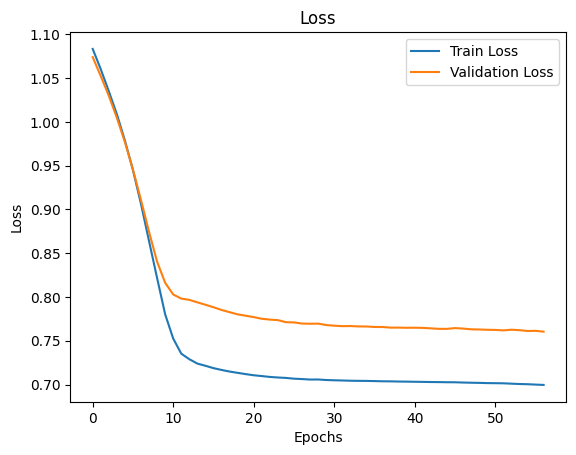

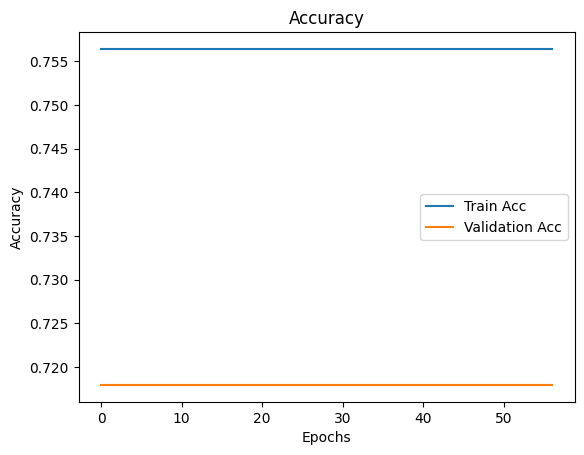

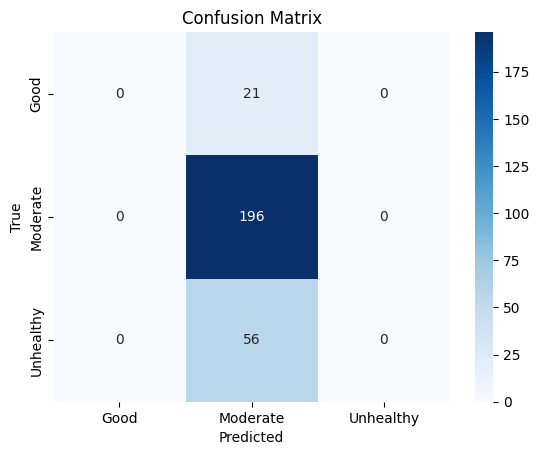

LSTM Test
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        12
           1     0.7566    1.0000    0.8614       115
           2     0.0000    0.0000    0.0000        25

    accuracy                         0.7566       152
   macro avg     0.2522    0.3333    0.2871       152
weighted avg     0.5724    0.7566    0.6517       152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


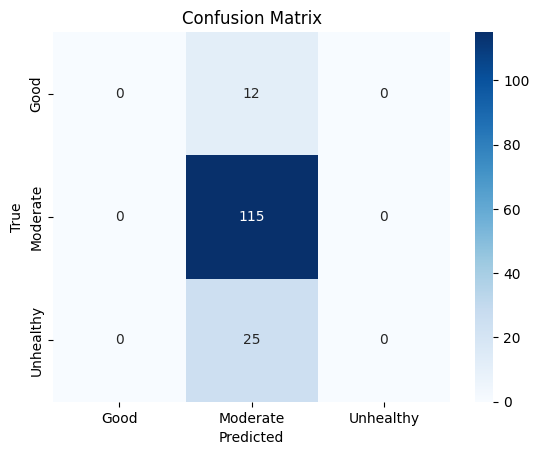

CNN train and validation
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0     0.8125    0.6190    0.7027        21
           1     0.9187    0.9796    0.9481       196
           2     0.9792    0.8393    0.9038        56

    accuracy                         0.9231       273
   macro avg     0.9034    0.8126    0.8516       273
weighted avg     0.9229    0.9231    0.9202       273



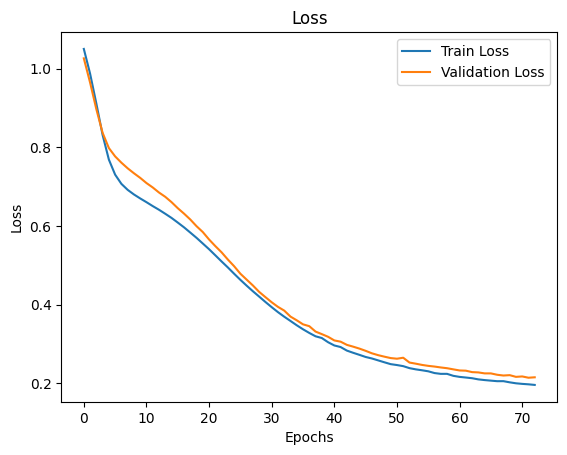

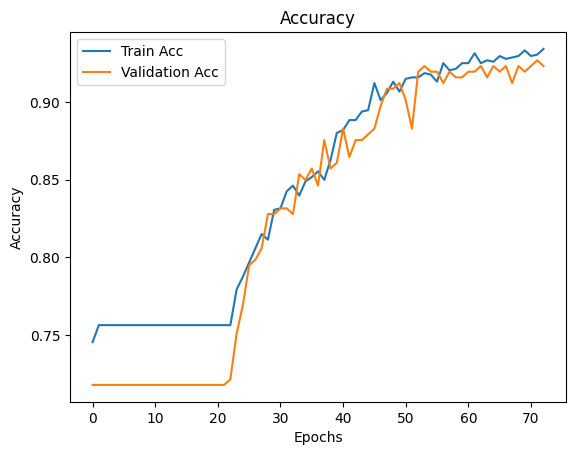

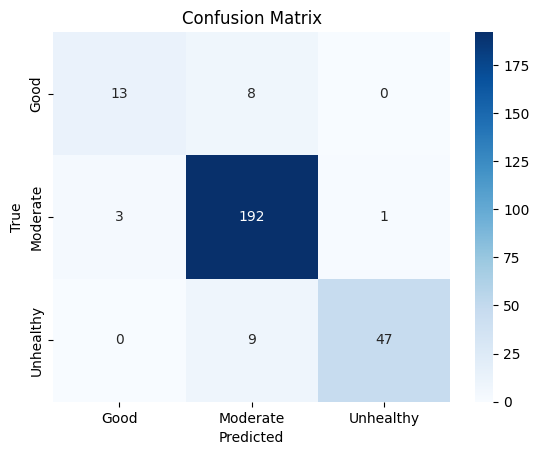

CNN Test
5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0     1.0000    0.8333    0.9091        12
           1     0.9339    0.9826    0.9576       115
           2     0.9048    0.7600    0.8261        25

    accuracy                         0.9342       152
   macro avg     0.9462    0.8586    0.8976       152
weighted avg     0.9343    0.9342    0.9322       152



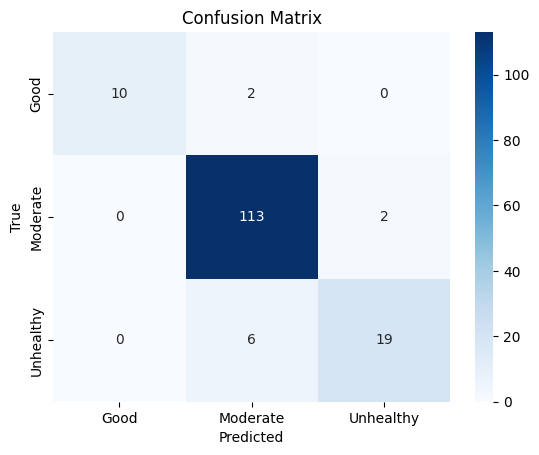


LSTM Average accuracy over 5-fold CV: 77.07%
CNN Average accuracy over 5-fold CV: 93.19%
Tabnet Average accuracy over 5-fold CV: 97.88%


In [ ]:
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
aug = ClassificationSMOTE(p=0.2)

acc_per_fold_lstm = []
acc_per_fold_cnn = []
acc_per_fold_tabnet = []

y_test_10_tabnet = np.argmax(y_test_10, axis=1)

for fold, (train, test) in enumerate(kfold.split(X_train_90, np.argmax(y_train_90, axis=1))):
    print(f"\n---- Training on Fold {fold + 1} ----")

    model_lstm = create_lstm_model()
    model_cnn = create_cnn_model(
        filters=38,
        kernel_size=3,
        dense_units=36,
        optimizer=Adam(learning_rate=0.07424181556238957)
    )

    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    y_train_tabnet = np.argmax(y_train, axis=1)
    y_test_tabnet = np.argmax(y_test, axis=1)

    #BEGIN Tabnet
    clf.fit(
        X_train, y_train_tabnet,
        eval_set=[(X_train, y_train_tabnet), (X_test, y_test_tabnet)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss', 'accuracy'],
        max_epochs=75,
        patience=100,
        augmentations=aug,
        batch_size=50
    )

    predictions = clf.predict(X_test)
    accuracy = np.mean(predictions == y_test_tabnet)
    confusion = confusion_matrix(y_test_tabnet, predictions, labels=[0, 1, 2])    # Calculate the confusion matrix
    acc_per_fold_tabnet.append(accuracy * 100)
    print("TabNet train and validation")
    print(classification_report(y_test_tabnet, predictions, digits=4))
    create_grafik (
        train_loss=clf.history['train_logloss'],
        valid_loss=clf.history['valid_logloss'],
        train_accuracy=clf.history['train_accuracy'],
        valid_accuracy=clf.history['valid_accuracy']
    )
    createConfusionMatrix(confusion)

    predictions = clf.predict(X_test_10)
    # accuracy = np.mean(predictions == y_test_10_tabnet)
    print("TabNet Test")
    print(classification_report(y_test_10_tabnet, predictions, digits=4))
    confusion = confusion_matrix(y_test_10_tabnet, predictions, labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #END Tabnet

    #BEGIN LSTM
    history_lstm = model_lstm.fit(X_train, y_train, epochs=57, batch_size=91, verbose=0, validation_data=(X_test, y_test))

    print("LSTM train and validation")
    scores = model_lstm.evaluate(X_test, y_test, verbose=0)
    acc_per_fold_lstm.append(scores[1] * 100)
    y_test_int = np.argmax(y_test, axis=1)
    y_pred = model_lstm.predict(X_test)
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    create_grafik (
        valid_loss=history_lstm.history['val_loss'],
        train_loss=history_lstm.history['loss'],
        train_accuracy=history_lstm.history['accuracy'],
        valid_accuracy=history_lstm.history['val_accuracy'],
    )
    createConfusionMatrix(confusion)

    print("LSTM Test")
    y_test_int = np.argmax(y_test_10, axis=1)
    y_pred = model_lstm.predict(X_test_10)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #END LSTM


    #BEGIN CNN
    history_cnn = model_cnn.fit(X_train, y_train, epochs=73, batch_size=44, verbose=0, validation_data=(X_test, y_test))
    print("CNN train and validation")
    scores = model_cnn.evaluate(X_test, y_test, verbose=0)
    acc_per_fold_cnn.append(scores[1] * 100)
    y_pred = model_cnn.predict(X_test)
    y_test_int = np.argmax(y_test, axis=1)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    create_grafik (
        valid_loss=history_cnn.history['val_loss'],
        train_loss=history_cnn.history['loss'],
        train_accuracy=history_cnn.history['accuracy'],
        valid_accuracy=history_cnn.history['val_accuracy'],
    )
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    print("CNN Test")
    y_test_int = np.argmax(y_test_10, axis=1)
    y_pred = model_cnn.predict(X_test_10)
    print(classification_report(y_test_int, np.argmax(y_pred, axis=1), digits=4))
    confusion = confusion_matrix(y_test_int, np.argmax(y_pred, axis=1), labels=[0, 1, 2])    # Calculate the confusion matrix
    createConfusionMatrix(confusion)

    #--END report--#

print(
    f"\nLSTM Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_lstm):.2f}%")

print(
    f"CNN Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_cnn):.2f}%")

print(
    f"Tabnet Average accuracy over {n_splits}-fold CV: {np.mean(acc_per_fold_tabnet):.2f}%")


# Kode bebas

In [ ]:
import pandas as pd

data = {
    'Model': ['Tabnet', 'LSTM', 'CNN'],
    'Precision': [97.57, 93.29, 93.27],
    'Recall': [95.72, 91.21, 92.54],
    'F1 Score': [96.51, 91.90, 92.52],
    'Accuracy': [98.17, 95.90, 95.60]
}

df = pd.DataFrame(data)
df

Model  Precision  Recall  F1 Score  Accuracy
0  Tabnet      97.57   95.72     96.51     98.17
1    LSTM      93.29   91.21     91.90     95.90
2     CNN      93.27   92.54     92.52     95.60

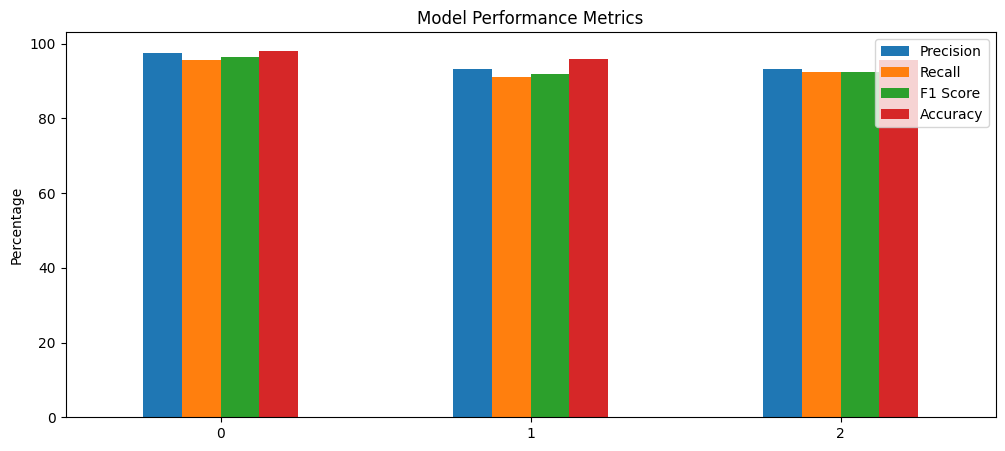

In [ ]:
# Set the 'Model' column as the index
# df.set_index('Model', inplace=True)

# # Transpose the DataFrame to have metrics as columns
# df = df.T

# Plot the data as a bar chart
df.plot(kind='bar', figsize=(12, 5))
plt.title('Model Performance Metrics')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()